# Diagnostics de Performance Energétique

#### Paramétres

In [65]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import missingno as msno
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Définir les chemins des fichiers DPE neufs
file_path_neuf_2021 = './Fichiers_Sources/dpe_logements_neufs_2021.csv'
# Définir les chemins des fichiers DPE existants
file_path_existant_21 = './Fichiers_Sources/dpe_logements_existants_2021.csv'

### Importation données DPE (neufs + existant)

In [17]:
# Lire et concaténer les fichiers DPE neufs + existent
df_neuf_2021 = pd.read_csv(file_path_neuf_2021)
df_existant_21 = pd.read_csv(file_path_existant_21)

C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3476514598.py:2: DtypeWarning: Columns (110,117,126,127,129,133) have mixed types. Specify dtype option on import or set low_memory=False.
  df_neuf_2021 = pd.read_csv(file_path_neuf_2021)
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3476514598.py:3: DtypeWarning: Columns (97,144,231,235,236,237,238,243) have mixed types. Specify dtype option on import or set low_memory=False.
  df_existant_21 = pd.read_csv(file_path_existant_21)


#### Concaténation des deux dfs (j'ai décédé de gardé que les colonnes communes entre les deux dfs)

In [18]:
#j'ai ajouté une colonne type batiment pour chaque df pour distinguer apres la concaténation (si on veut filtrer )
df_neuf_2021['type_batiment_add'] = 'neuf'
df_existant_21['type_batiment_add'] = 'existant'
# Trouver les colonnes communes entre les deux DataFrames
colonnes_communes = df_neuf_2021.columns.intersection(df_existant_21.columns)
# Concaténer uniquement les colonnes communes
df_final_combined = pd.concat([df_neuf_2021[colonnes_communes], df_existant_21[colonnes_communes]], ignore_index=True)
# Vérifier le résultat
print(df_final_combined.head())

   Conso_chauffage_dépensier_é_finale    Nom__commune_(BAN)  \
0                              1249.3           Saint-Claud   
1                              3586.8               Béziers   
2                               285.5              Gardanne   
3                               414.6  Mandelieu-la-Napoule   
4                               975.7         Gujan-Mestras   

   Emission_GES_chauffage  Coût_total_5_usages  \
0                    85.1                629.0   
1                   244.3                983.8   
2                    19.4                245.4   
3                    28.2                339.1   
4                    66.4                503.6   

   Coordonnée_cartographique_X_(BAN)  Nombre_niveau_logement  \
0                          504005.51                     1.0   
1                          717922.25                     NaN   
2                          901125.57                     1.0   
3                         1018327.98                     NaN   


In [19]:
# Filtrer par l'adresse spécifique
adresse_filtre = "396 Avenue Georges Clemenceau 83330 Le Castellet"
df_filtre = df_final_combined[df_final_combined['Adresse_(BAN)'] == adresse_filtre]
# Grouper par étiquette DPE et calculer la somme ou la moyenne selon les besoins
df_grouped = df_filtre.groupby('Etiquette_DPE').agg({
    'Conso_5_usages_par_m²_é_primaire': 'mean',  # moyenne de la consommation par m²
    'Conso_5_usages_é_finale': 'sum',            # somme de la consommation totale
    'Surface_habitable_logement': 'sum' 
    # somme des surfaces
}).reset_index()

# Afficher le résultat
df_grouped


,Etiquette_DPE,Conso_5_usages_par_m²_é_primaire,Conso_5_usages_é_finale,Surface_habitable_logement
0,A,26.3,823.3,72.1


In [20]:
adresse_filtre = "396 Avenue Georges Clemenceau 83330 Le Castellet"
df_filtre = df_final_combined[df_final_combined['Adresse_(BAN)'] == adresse_filtre]

# Grouper par N°DPE et calculer la somme ou la moyenne selon les besoins
df_grouped = df_filtre.groupby('N°DPE').agg({
    'Conso_5_usages_par_m²_é_primaire': 'mean',  # moyenne de la consommation par m²
    'Conso_5_usages_é_finale': 'sum',            # somme de la consommation totale
    'Surface_habitable_logement': 'sum'          # somme des surfaces
}).reset_index()

# Afficher le résultat
df_grouped


,N°DPE,Conso_5_usages_par_m²_é_primaire,Conso_5_usages_é_finale,Surface_habitable_logement
0,2283N1715129C,26.3,823.3,72.1


In [21]:
df_final_combined.shape

(190543, 133)

In [22]:
# Liste des colonnes numériques
colonnes_numeriques = df_final_combined.select_dtypes(include=['number']).columns

print("Colonnes numériques :", colonnes_numeriques.tolist())

Colonnes numériques : ['Conso_chauffage_dépensier_é_finale', 'Emission_GES_chauffage', 'Coût_total_5_usages', 'Coordonnée_cartographique_X_(BAN)', 'Nombre_niveau_logement', 'Conso_5_usages_par_m²_é_primaire', 'Coût_refroidissement', 'Ubat_W/m²_K', 'Coût_ECS_dépensier', 'Emission_GES_auxiliaires', 'Emission_GES_5_usages_par_m²', 'Emission_GES_éclairage', 'Conso_ECS_dépensier_é_finale', 'Coût_ECS', 'Coût_éclairage', 'Conso_refroidissement_é_finale', 'Conso_chauffage_é_primaire', 'Conso_éclairage_é_primaire', 'Emission_GES_5_usages_énergie_n°1', 'Nombre_appartement', 'Conso_5_usages_é_finale', 'Conso_refroidissement_é_primaire', 'N°_région_(BAN)', 'Surface_habitable_logement', 'Code_postal_(brut)', 'Coordonnée_cartographique_Y_(BAN)', '_rand', 'Emission_GES_ECS_dépensier', 'Emission_GES_refroidissement', 'Emission_GES_ECS', 'Coût_ECS_énergie_n°1', 'Conso_ECS_é_finale', 'Emission_GES_5_usages', 'Code_postal_(BAN)', 'Conso_éclairage_é_finale', 'Coût_refroidissement_dépensier', 'Emission_GES

In [23]:
# Liste des colonnes catégorielles
colonnes_categorielles = df_final_combined.select_dtypes(include=['category', 'object']).columns

print("Colonnes catégorielles :", colonnes_categorielles.tolist())

Colonnes catégorielles : ['Nom__commune_(BAN)', 'Type_installation_ECS_(général)', 'Catégorie_ENR', 'Adresse_(BAN)', 'Date_visite_diagnostiqueur', "Complément_d'adresse_logement", 'Date_établissement_DPE', 'N°_voie_(BAN)', 'N°DPE', 'Logement_traversant_(0/1)', 'Appartement_non_visité_(0/1)', 'Adresse_brute', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs', 'Statut_géocodage', 'Modèle_DPE', 'N°_département_(BAN)', 'Nom_résidence', 'Méthode_application_DPE', 'Classe_altitude', 'Indicateur_confort_été', 'Type_énergie_n°1', 'Date_réception_DPE', 'Présence_brasseur_air_(0/1)', 'Date_fin_validité_DPE', 'Type_bâtiment', 'Protection_solaire_exterieure_(0/1)', '_geopoint', 'Zone_climatique_', 'Type_installation_chauffage', 'Type_énergie_principale_chauffage', 'Inertie_lourde_(0/1)', 'Qualité_isolation_enveloppe', 'Isolation_toiture_(0/1)', 'Etiquette_GES', 'Etiquette_DPE', 'N°_DPE_immeuble_associé', 'Qualité_isolation_plancher_bas', 'Identifiant__BAN', 'Nom__rue_(BAN)', 'Code_INSEE_(B

In [24]:
df_final_combined["Identifiant__BAN"].unique()

array(['16308_0008', '34032_4940', '13041_0849', ..., '73091_0980_00118',
       '77514_0700_00070', '24322_1060_00014'], dtype=object)

In [25]:
df_final_combined['Adresse_(BAN)'] = df_final_combined['Adresse_(BAN)'].str.lower()
df_final_combined['Adresse_(BAN)'] = df_final_combined['Adresse_(BAN)'].str.strip()
df_final_combined['Adresse_(BAN)'] = df_final_combined['Adresse_(BAN)'].str.replace(r'\s+', ' ', regex=True)

###  Vérification des doublons par adresse (id_ban) et date d'établissement du DPE, avec suppression des doublons existants

In [26]:
# Grouper par Adresse, Identifiant et Date
doublons_groupes_date = df_final_combined.groupby(['Identifiant__BAN','N°DPE']).size().reset_index(name='counts')

# Filtrer les groupes avec plus d'une occurrence
doublons_groupes_date = doublons_groupes_date[doublons_groupes_date['counts'] > 1]

print(doublons_groupes_date)


        Identifiant__BAN          N°DPE  counts
4       01004_0165_00055  2401E0868779T       2
9             01004_0380  2401E2294302O       2
14      01004_0540_00010  2301E3624358N       2
16      01004_0640_00021  2101E0603312J       2
50            01008_0082  2301E0539450F       2
...                  ...            ...     ...
158884        97228_0254  2320E4238446A       2
158885        97228_0254  2327E0063963G       2
158886        97228_0254  2344E0242180K       2
158887        97228_0254  2366E0469202W       2
158892  97412_1085_00086  2344E3314855F       2

[29407 rows x 3 columns]


In [27]:
# Garder la dernière occurrence pour chaque 'Identifiant__BAN'
df_sans_doublons = df_final_combined.drop_duplicates(subset=['Identifiant__BAN'], keep='last')

# Affichage du DataFrame sans doublons
print(df_sans_doublons)

        Conso_chauffage_dépensier_é_finale     Nom__commune_(BAN)  \
0                                   1249.3            Saint-Claud   
5                                   1095.0  Roullet-Saint-Estèphe   
7                                    900.2                Lorgues   
9                                   2176.2             Pierreclos   
10                                  3210.2     Morville-en-Beauce   
...                                    ...                    ...   
190538                              1673.4                 Lauret   
190539                             46361.0                 Angers   
190540                              4196.9                 Conjux   
190541                              2934.1           Villeparisis   
190542                              1055.9              Périgueux   

        Emission_GES_chauffage  Coût_total_5_usages  \
0                         85.1                629.0   
5                         74.6                501.0   
7     

In [28]:
df_sans_doublons.shape

(87499, 133)

### Afficher les valeurs manquantes

In [29]:
missing_values = df_sans_doublons.isnull().mean() * 100
print(missing_values[missing_values > 0])

Conso_chauffage_dépensier_é_finale     0.050286
Nom__commune_(BAN)                     0.001143
Emission_GES_chauffage                 0.050286
Coût_total_5_usages                    0.050286
Coordonnée_cartographique_X_(BAN)      0.001143
                                        ...    
N°_RPLS_logement                      99.971428
Emission_GES_5_usages_énergie_n°3     97.451399
Type_énergie_n°3                      97.451399
Coût_ECS_énergie_n°3                  97.451399
Coût_chauffage_énergie_n°3            97.451399
Length: 96, dtype: float64


### Supprimer les Colonnes avec un Taux de Valeurs Manquantes Très Élevé

In [30]:
seuil = 90
colonnes_a_supprimer = missing_values[missing_values > seuil].index
df_ss_doublons = df_sans_doublons.drop(columns=colonnes_a_supprimer)

print(f"Colonnes supprimées : {colonnes_a_supprimer.tolist()}")


Colonnes supprimées : ['Nom_résidence', 'N°_DPE_immeuble_associé', '_score', 'Typologie_logement', 'Position_logement_dans_immeuble', 'N°_DPE_remplacé', 'Invariant_fiscal_logement', "Cage_d'escalier", 'Surface_tertiaire_immeuble', 'N°_RPLS_logement', 'Emission_GES_5_usages_énergie_n°3', 'Type_énergie_n°3', 'Coût_ECS_énergie_n°3', 'Coût_chauffage_énergie_n°3']


## Imputation des Valeurs Manquantes

### Pour les Variables Numériques

In [31]:
# Imputer avec la médiane pour les colonnes numériques
num_cols = df_sans_doublons.select_dtypes(include=['number']).columns
for col in num_cols :
    df_sans_doublons[col].fillna(df_sans_doublons[col].median(), inplace=True)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\106120886.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sans_doublons[col].fillna(df_sans_doublons[col].median(), inplace=True)
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\106120886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sans_doublons[col].fillna(df_sans_doublons[

### Pour les Variables Catégorielles

In [32]:
# Imputer avec la valeur la plus fréquente pour les colonnes catégorielles
cat_cols = df_sans_doublons.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    df_sans_doublons[col].fillna(df_sans_doublons[col].mode()[0], inplace=True)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3615466277.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sans_doublons[col].fillna(df_sans_doublons[col].mode()[0], inplace=True)
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3615466277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sans_doublons[col].fillna(df_sans_doublo

### Supprimer les Lignes avec Trop de Valeurs Manquantes

In [33]:
# Supprimer les lignes ayant plus de 50% de valeurs manquantes
seuil_lignes = 50
df_combined_2 = df_sans_doublons[df_sans_doublons.isnull().mean(axis=1) < (seuil_lignes / 100)]

print(f"Nombre de lignes après suppression : {len(df_combined_2)}")


Nombre de lignes après suppression : 87499


In [34]:
df_combined_2["Adresse_(BAN)"]

0                     rue de clos galine 16450 saint-claud
5         7 route de mouthiers 16440 roullet-saint-estèphe
7                      le clos des amandiers 83510 lorgues
9                      route de vergisson 71960 pierreclos
10              rue des robiniers 45300 morville-en-beauce
                                ...                       
190538              7 lotissement la combette 34270 lauret
190539                         26 rue bougère 49000 angers
190540                 118 montee des lardars 73310 conjux
190541               70 rue jean jaurès 77270 villeparisis
190542                   14 rue de la cité 24000 périgueux
Name: Adresse_(BAN), Length: 87499, dtype: object

### Vérification des Valeurs Manquantes Restantes

In [35]:
# Vérification des valeurs manquantes restantes
missing_values_restantes = df_combined_2.isnull().mean() * 100
print(missing_values_restantes[missing_values_restantes > 0])


_score    100.0
dtype: float64


In [36]:
df_combined_2 = df_combined_2.drop(columns=['_score'])

In [37]:
# Obtenir des informations générales sur le DataFrame
df_combined_2.info()
# Obtenir des statistiques descriptives
df_combined_2.describe(include='all')  # Inclut les colonnes catégorielles


<class 'pandas.core.frame.DataFrame'>
Index: 87499 entries, 0 to 190542
Columns: 132 entries, Conso_chauffage_dépensier_é_finale to type_batiment_add
dtypes: bool(6), float64(74), int64(3), object(49)
memory usage: 85.3+ MB


,Conso_chauffage_dépensier_é_finale,Nom__commune_(BAN),Emission_GES_chauffage,Coût_total_5_usages,Coordonnée_cartographique_X_(BAN),Nombre_niveau_logement,Type_installation_ECS_(général),Conso_5_usages_par_m²_é_primaire,Coût_refroidissement,Ubat_W/m²_K,...,Besoin_chauffage,Deperditions_enveloppe,Cage_d'escalier,Surface_tertiaire_immeuble,N°_RPLS_logement,Emission_GES_5_usages_énergie_n°3,Type_énergie_n°3,Coût_ECS_énergie_n°3,Coût_chauffage_énergie_n°3,type_batiment_add
count,8.749900e+04,87499,87499.000000,87499.000000,8.749900e+04,87499.000000,87499,87499.000000,87499.000000,87499.000000,...,8.749900e+04,87499.000000,87499,87499.00000,8.749900e+04,87499.000000,87499,87499.000000,87499.000000,87499
unique,NaN,16131,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,65,NaN,NaN,NaN,10,NaN,NaN,2
top,NaN,Paris,NaN,NaN,NaN,NaN,individuel,NaN,NaN,NaN,...,NaN,NaN,Sans objet,NaN,NaN,NaN,Électricité,NaN,NaN,existant
freq,NaN,2657,NaN,NaN,NaN,NaN,80034,NaN,NaN,NaN,...,NaN,NaN,87228,NaN,NaN,NaN,85926,NaN,NaN,50568
mean,9.126639e+03,NaN,1247.314765,1182.509488,6.421673e+05,1.236963,NaN,165.556826,7.361362,0.790733,...,1.807297e+04,516.026703,NaN,368.82879,2.030032e+07,3611.718993,NaN,228.539438,1308.779329,NaN
std,3.498263e+04,NaN,5661.217006,3432.954485,2.183473e+05,0.815774,NaN,530.195307,156.347148,3.515914,...,6.767789e+04,1884.023062,NaN,58.24106,1.752679e+05,651.501276,NaN,31.101376,218.183135,NaN
min,0.000000e+00,NaN,0.000000,11.000000,7.081550e-01,1.000000,NaN,1.200000,0.000000,0.000000,...,0.000000e+00,0.100000,NaN,19.70000,7.000000e+00,0.000000,NaN,0.000000,0.000000,NaN
25%,1.498700e+03,NaN,90.100000,495.700000,4.570111e+05,1.000000,NaN,52.600000,0.000000,0.330000,...,6.208900e+03,176.800000,NaN,368.40000,2.030041e+07,3595.550000,NaN,227.850000,1304.700000,NaN
50%,3.469500e+03,NaN,216.900000,738.800000,6.507068e+05,1.000000,NaN,127.000000,0.000000,0.530000,...,7.514200e+03,206.900000,NaN,368.40000,2.030041e+07,3595.550000,NaN,227.850000,1304.700000,NaN
75%,1.012735e+04,NaN,985.300000,1293.000000,8.307785e+05,1.000000,NaN,241.300000,0.000000,1.010000,...,9.114150e+03,242.500000,NaN,368.40000,2.030041e+07,3595.550000,NaN,227.850000,1304.700000,NaN


### Analyse exploratoire

C:\Users\33780\AppData\Local\Temp\ipykernel_33360\853835139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined_2, x='Etiquette_DPE', palette='viridis')


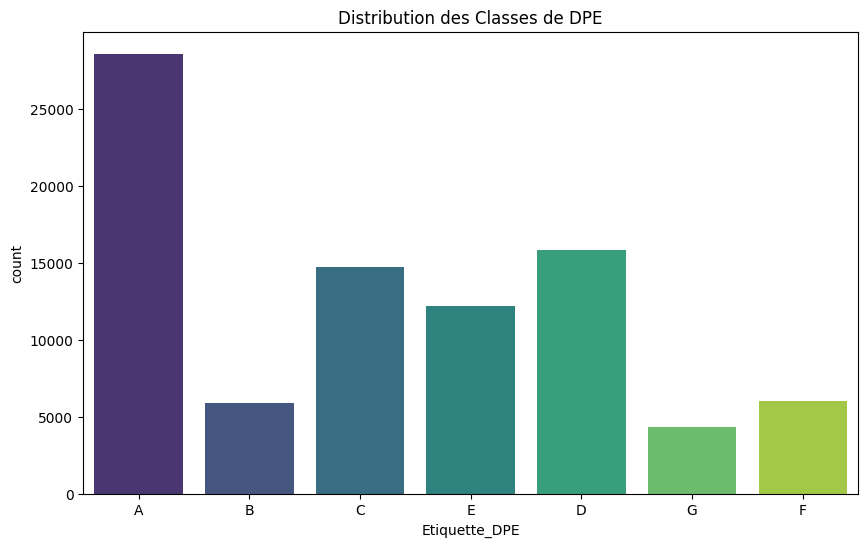

C:\Users\33780\AppData\Local\Temp\ipykernel_33360\853835139.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined_2, x='Etiquette_DPE', y='Conso_5_usages_é_finale', palette='viridis')


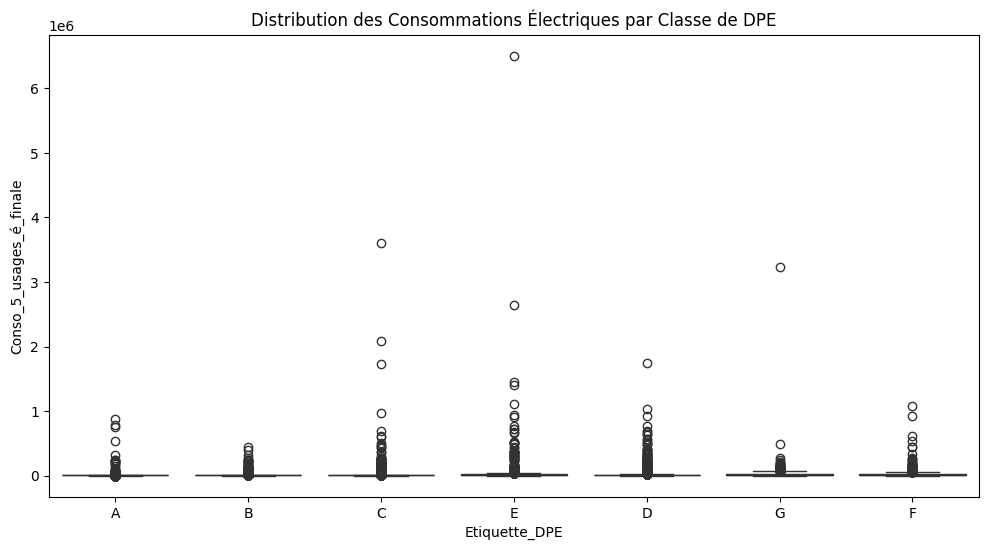

In [38]:
# Distribution des classes de DPE
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined_2, x='Etiquette_DPE', palette='viridis')
plt.title('Distribution des Classes de DPE')
plt.show()

# Distribution des consommations électriques par classe de DPE
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined_2, x='Etiquette_DPE', y='Conso_5_usages_é_finale', palette='viridis')
plt.title('Distribution des Consommations Électriques par Classe de DPE')
plt.show();

**Interprétation**
* Le 1er graphe :
>Classe A : C'est la classe la plus représentée, avec plus de 120 000 logements. Cela signifie qu'une majorité des logements dans l'ensemble de données sont très économes en énergie.
>Classe C : La deuxième classe la plus représentée avec environ 110 000 logements.
>Classes D et E : Ces classes ont également une présence notable, avec un nombre décroissant respectivement.
>Classe G : Représente la classe la moins fréquente avec un nombre beaucoup plus faible, autour de 10 000 logements.
* Le 2nd :
>Pour chaque classe de DPE (de A à F), on observe une boîte à moustaches qui représente la répartition de la consommation énergétique.
>La partie centrale de chaque boîte représente la médiane (la ligne noire à l'intérieur de la boîte) et les quartiles (Q1 et Q3), indiquant où se situent 50 % des valeurs.
>Les extrémités des moustaches montrent la distribution de la majorité des données, avec quelques points au-delà de celles-ci représentant des outliers.

In [39]:
# Calcul des quartiles (Q1 et Q3) et de l'IQR (Interquartile Range)
Q1 = df_combined_2['Conso_5_usages_é_finale'].quantile(0.25)
Q3 = df_combined_2['Conso_5_usages_é_finale'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes (outliers)
outliers = df_combined_2[(df_combined_2['Conso_5_usages_é_finale'] < lower_bound) | (df_combined_2['Conso_5_usages_é_finale'] > upper_bound)]

# Remplacer les valeurs en dehors des limites par Q1 ou Q3
df_combined_2['Conso_5_usages_é_finale'] = df_combined_2['Conso_5_usages_é_finale'].apply(
    lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
)

# Vérifier le résultat
print(df_combined_2['Conso_5_usages_é_finale'].describe())


count    87499.000000
mean      6709.036202
std       5333.234822
min         37.800000
25%       2360.650000
50%       4703.000000
75%      10989.425000
max      23928.800000
Name: Conso_5_usages_é_finale, dtype: float64


### Analyse de l'Impact de la Classe de DPE

Etiquette_DPE
A     2289.405173
B     4461.020549
C     6686.412445
D     9696.750551
E    10684.911793
F    11099.180992
G    10829.606419
Name: Conso_5_usages_é_finale, dtype: float64


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\4276539667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consommation_moyenne_dpe.index, y=consommation_moyenne_dpe.values, palette='viridis')


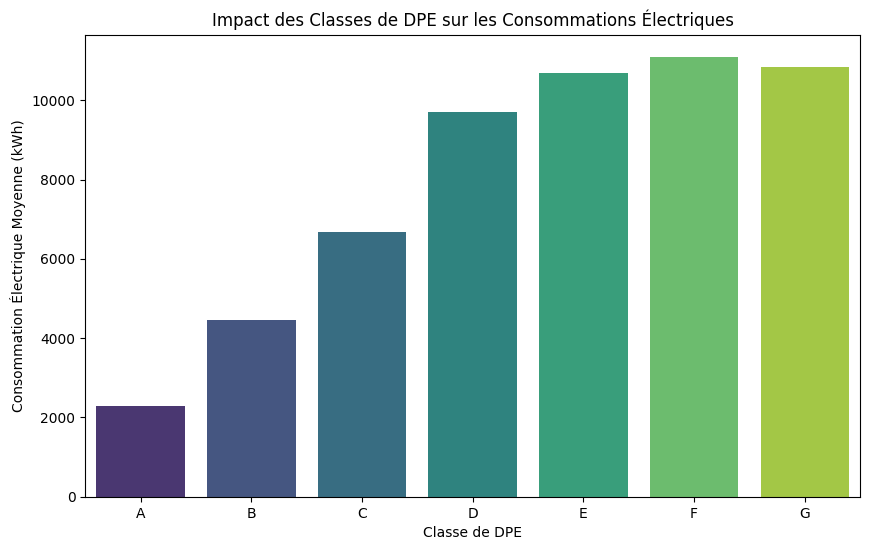

In [40]:
# Calcul de la consommation moyenne par classe de DPE
consommation_moyenne_dpe = df_combined_2.groupby('Etiquette_DPE')['Conso_5_usages_é_finale'].mean()

print(consommation_moyenne_dpe)

# Visualisation de l'impact des classes DPE sur les consommations électriques
plt.figure(figsize=(10, 6))
sns.barplot(x=consommation_moyenne_dpe.index, y=consommation_moyenne_dpe.values, palette='viridis')
plt.title('Impact des Classes de DPE sur les Consommations Électriques')
plt.xlabel('Classe de DPE')
plt.ylabel('Consommation Électrique Moyenne (kWh)')
plt.show()


### Analyse des Colonnes Catégorielles

### Répartition par classe DPE et GES

### Boxplots catégoriels

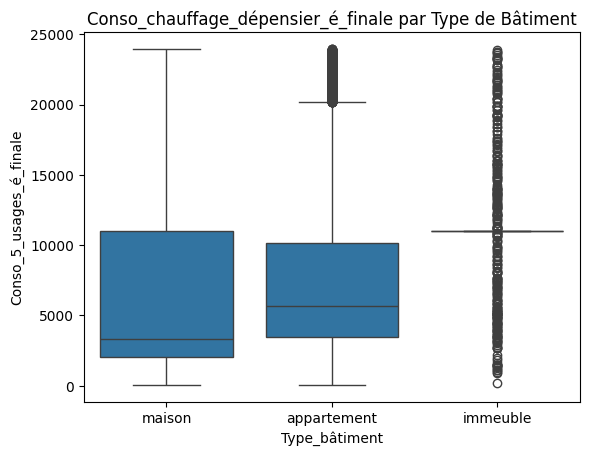

In [41]:
sns.boxplot(x='Type_bâtiment', y='Conso_5_usages_é_finale', data=df_combined_2)
plt.title('Conso_chauffage_dépensier_é_finale par Type de Bâtiment')
plt.show()

**Remarque**
Appartements et maisons : Ces deux types de bâtiments ont une distribution assez similaire en termes de consommation énergétique, bien que les maisons aient une consommation légèrement plus élevée en moyenne.
Immeubles : La distribution est plus complexe. Bien que la médiane soit similaire aux appartements, il existe une grande variabilité avec des immeubles ayant des consommations extrêmement élevées. Cela pourrait s'expliquer par la taille des immeubles, le nombre de logements, ou des systèmes de chauffage partagés, qui pourraient entraîner une plus grande variabilité dans la consommation.

##  Analyse des Coûts et Consommations

### Tableau croisé dynamique

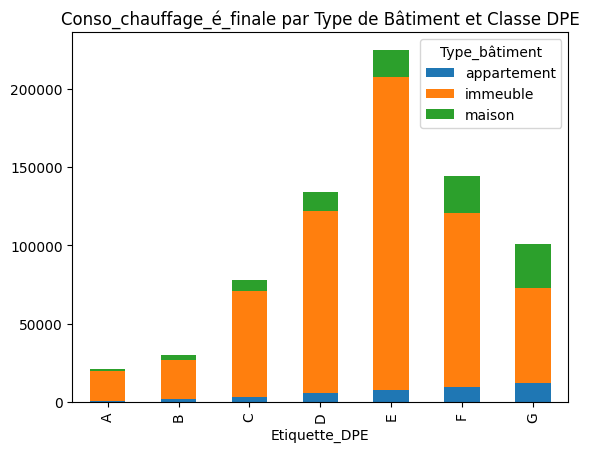

In [42]:
pd.crosstab(df_combined_2['Etiquette_DPE'], df_combined_2['Type_bâtiment'], values=df_combined_2['Conso_chauffage_é_finale'], aggfunc='mean').plot(kind='bar', stacked=True)
plt.title('Conso_chauffage_é_finale par Type de Bâtiment et Classe DPE')
plt.show()

### Importation Données ENEDIS

In [45]:
# Définir les chemins des fichiers
file_path_enedis_23 = './Fichiers_Sources/consommation-annuelle-residentielle_2023/part-00000-4302ba05-6ec8-458a-ab7c-112d8d56f816-c000.csv'
file_path_enedis_22 = './Fichiers_Sources/consommation-annuelle-residentielle_2022/part-00000-79cc601a-85e7-4b4e-ab4d-ba2bad69af14-c000.csv'
file_path_enedis_21 = './Fichiers_Sources/consommation-annuelle-residentielle_2021/part-00000-11e6d32b-59a4-475d-881e-57c3277239c1-c000.csv'

try:
    Enedis_23 = pd.read_csv(file_path_enedis_23, delimiter=';')
    print("Lecture réussie pour le fichier 2023")
except Exception as e:
    print(f"Erreur lors de la lecture du fichier 2023 : {e}")

try:
    Enedis_22 = pd.read_csv(file_path_enedis_22, delimiter=';')
    print("Lecture réussie pour le fichier 2022")
except Exception as e:
    print(f"Erreur lors de la lecture du fichier 2022 : {e}")

try:
    Enedis_21 = pd.read_csv(file_path_enedis_21, delimiter=';')
    print("Lecture réussie pour le fichier 2021")
except Exception as e:
    print(f"Erreur lors de la lecture du fichier 2021 : {e}")

# Fusionner les DataFrames en un seul
df_combined_enedis = pd.concat([Enedis_23, Enedis_22, Enedis_21], ignore_index=True)

# Afficher les premières lignes du DataFrame fusionné
print(df_combined_enedis.head())

# # Sauvegarder le DataFrame fusionné dans un nouveau fichier CSV (optionnel)
# df_combined_enedis.to_csv('C:/Users/33780/pfe/Dpe_J_ENDEIS_VF/consommation-annuelle-residentielle_combined.csv', index=False, sep=';')


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3683056693.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Enedis_23 = pd.read_csv(file_path_enedis_23, delimiter=';')


Lecture réussie pour le fichier 2023


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3683056693.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Enedis_22 = pd.read_csv(file_path_enedis_22, delimiter=';')


Lecture réussie pour le fichier 2022


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3683056693.py:19: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Enedis_21 = pd.read_csv(file_path_enedis_21, delimiter=';')


Lecture réussie pour le fichier 2021
   annee  code_iris             nom_iris  numero_de_voie  \
0   2023  590090206              Château               1   
1   2023  830610116         Tour de Mare               1   
2   2023  954910103        Saint-Nicolas               1   
3   2023  952190202      Les Passerelles               1   
4   2023  930530106  Centre Ville Gare 3               1   

   indice_de_repetition type_de_voie  libelle_de_voie  code_commune  \
0                   NaN        ALLEE       CHANTECLER         59009   
1                   NaN        ALLEE      DE BELLEVUE         83061   
2                   NaN        ALLEE     DE CHAMPAGNE         95491   
3                   NaN        ALLEE      DE LA FORET         95219   
4                   NaN        ALLEE  DE LA MADELEINE         93053   

           nom_commune segment_de_client  ...  \
0    Villeneuve-d'Ascq       RESIDENTIEL  ...   
1               Fréjus       RESIDENTIEL  ...   
2  Le Plessis-Bouchard      

In [46]:
Enedis_21.shape

(249119, 22)

In [47]:
# Liste des colonnes numériques
colonnes_numeriques_enedis = Enedis_21.select_dtypes(include=['number']).columns

print("Colonnes numériques :", colonnes_numeriques_enedis.tolist())

Colonnes numériques : ['annee', 'numero_de_voie', 'indice_de_repetition', 'code_commune', 'nombre_de_logements', 'consommation_annuelle_totale_de_l_adresse_mwh', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'consommation_annuelle_moyenne_de_la_commune_mwh', 'code_epci', 'code_departement', 'code_region', 'tri_des_adresses']


In [48]:
# Liste des colonnes catégorielles
colonnes_categorielles_enedis = Enedis_21.select_dtypes(include=['category', 'object']).columns

print("Colonnes catégorielles :", colonnes_categorielles_enedis.tolist())

Colonnes catégorielles : ['code_iris', 'nom_iris', 'type_de_voie', 'libelle_de_voie', 'nom_commune', 'segment_de_client', 'adresse', 'adresse_brute', 'adresse_normalisee_insee', 'id']


### Vérification de doublons 

In [49]:
# Identifier les doublons en fonction de 'id', 'annee', et 'adresse'
doublons = Enedis_21[Enedis_21.duplicated(subset=['id', 'annee', 'adresse'], keep=False)]

# Grouper les doublons par 'annee' et 'adresse', et compter le nombre de doublons pour chaque groupe
grouped_doublons = doublons.groupby(['annee', 'adresse','id']).size().reset_index(name='nombre_de_doublons')

# Filtrer pour les adresses ayant plus d'une occurrence dans la même année (plus d'un doublon)
grouped_doublons = grouped_doublons[grouped_doublons['nombre_de_doublons'] > 1]

# Afficher le résultat
print(grouped_doublons)


       annee                    adresse                  id  \
0       2021       1 ALLEE ALBERT CAMUS    92032_0025_00001   
1       2021             1 ALLEE AMPERE    92078_0038_00001   
2       2021  1 ALLEE ANTOINE BOURDELLE  92023_cl0c11_00001   
3       2021     1 ALLEE ANTOINE PORTAL    92023_0072_00001   
4       2021    1 ALLEE ANTOINE WATTEAU    92020_9700_00001   
...      ...                        ...                 ...   
18011   2021      99 RUE LOUIS ROUQUIER    92044_5170_00099   
18012   2021     99 RUE MARCEL DASSAULT    92012_6147_00099   
18013   2021              99 RUE MARTRE    92024_6140_00099   
18014   2021               99 RUE RIVAY    92044_8150_00099   
18015   2021      99 RUE YOURI GAGARINE    92025_9970_00099   

       nombre_de_doublons  
0                       2  
1                       2  
2                       2  
3                       2  
4                       2  
...                   ...  
18011                   2  
18012              

In [50]:
# Filtrer les lignes pour l'adresse "1 avenue Joseph Froment 92035 la Garenne-Colombes"
adresse_filtre = "92032_0025_00001"
df_filtre = Enedis_21[Enedis_21['id'] == adresse_filtre]

# Grouper par 'annee' et 'id', puis compter le nombre de lignes pour chaque groupe
grouped = df_filtre.groupby(['annee', 'id']).size().reset_index(name='nombre_de_lignes')

# Afficher le résultat
print(grouped)


   annee                id  nombre_de_lignes
0   2021  92032_0025_00001                 2


In [51]:
# Supprimer les doublons en gardant uniquement la première occurrence pour chaque combinaison 'id' et 'annee'
df_combined_enedis_clean = Enedis_21.drop_duplicates(subset=['id'], keep='first')

# Vérifier le résultat
print(f"Nombre de lignes après suppression des doublons : {df_combined_enedis_clean.shape[0]}")
print(df_combined_enedis_clean.head())


Nombre de lignes après suppression des doublons : 231082
   annee  code_iris             nom_iris  numero_de_voie  \
0   2021  590090206              Château               1   
1   2021  830610116         Tour de Mare               1   
2   2021  954910103        Saint-Nicolas               1   
3   2021  952190202      Les Passerelles               1   
4   2021  930530106  Centre Ville Gare 3               1   

   indice_de_repetition type_de_voie  libelle_de_voie  code_commune  \
0                   NaN        ALLEE       CHANTECLER         59009   
1                   NaN        ALLEE      DE BELLEVUE         83061   
2                   NaN        ALLEE     DE CHAMPAGNE         95491   
3                   NaN        ALLEE      DE LA FORET         95219   
4                   NaN        ALLEE  DE LA MADELEINE         93053   

           nom_commune segment_de_client  ...  \
0    Villeneuve-d'Ascq       RESIDENTIEL  ...   
1               Fréjus       RESIDENTIEL  ...   
2  Le Pl

In [52]:
df_combined_enedis_clean.shape

(231082, 22)

In [53]:
valeurs_nulles = df_combined_enedis_clean.isnull().sum()

print(valeurs_nulles)



annee                                                           0
code_iris                                                       0
nom_iris                                                        0
numero_de_voie                                                  0
indice_de_repetition                                       231082
type_de_voie                                                 1325
libelle_de_voie                                                 0
code_commune                                                    0
nom_commune                                                     0
segment_de_client                                               0
nombre_de_logements                                             0
consommation_annuelle_totale_de_l_adresse_mwh                   0
consommation_annuelle_moyenne_par_site_de_l_adresse_mwh         0
consommation_annuelle_moyenne_de_la_commune_mwh                 0
adresse                                                         0
code_epci 

In [54]:
# Calculer le mode de 'type_de_voie'
mode_type_de_voie = df_combined_enedis_clean['type_de_voie'].mode()[0]
df_combined_enedis_clean['indice_de_repetition'] = df_combined_enedis_clean['indice_de_repetition'].fillna('')
df_combined_enedis_clean['type_de_voie'] = df_combined_enedis_clean['type_de_voie'].fillna(mode_type_de_voie)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\574283616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean['indice_de_repetition'] = df_combined_enedis_clean['indice_de_repetition'].fillna('')
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\574283616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean['type_de_voie'] = df_combined_enedis_clean['type_de_voie'].fillna(mode_type_de_voie)


In [55]:
valeurs_nulles = df_combined_enedis_clean.isnull().sum()
print(valeurs_nulles)

annee                                                      0
code_iris                                                  0
nom_iris                                                   0
numero_de_voie                                             0
indice_de_repetition                                       0
type_de_voie                                               0
libelle_de_voie                                            0
code_commune                                               0
nom_commune                                                0
segment_de_client                                          0
nombre_de_logements                                        0
consommation_annuelle_totale_de_l_adresse_mwh              0
consommation_annuelle_moyenne_par_site_de_l_adresse_mwh    0
consommation_annuelle_moyenne_de_la_commune_mwh            0
adresse                                                    0
code_epci                                                  0
code_departement        

In [56]:

df_combined_enedis_clean['annee'].unique()

array([2021], dtype=int64)

In [57]:
df_combined_enedis_clean.columns

Index(['annee', 'code_iris', 'nom_iris', 'numero_de_voie',
       'indice_de_repetition', 'type_de_voie', 'libelle_de_voie',
       'code_commune', 'nom_commune', 'segment_de_client',
       'nombre_de_logements', 'consommation_annuelle_totale_de_l_adresse_mwh',
       'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh',
       'consommation_annuelle_moyenne_de_la_commune_mwh', 'adresse',
       'code_epci', 'code_departement', 'code_region', 'tri_des_adresses',
       'adresse_brute', 'adresse_normalisee_insee', 'id'],
      dtype='object')

In [58]:
# Grouper par 'nombre_de_logements' et calculer la somme des consommations annuelles
df_grouped = df_combined_enedis_clean.groupby('nombre_de_logements').agg({
    'consommation_annuelle_totale_de_l_adresse_mwh': 'sum',  # Somme des consommations totales
    'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh': 'mean',  # Moyenne des consommations par site
    'consommation_annuelle_moyenne_de_la_commune_mwh': 'mean'  # Moyenne des consommations par commune
}).reset_index()

# Afficher les résultats
print(df_grouped.head())


   nombre_de_logements  consommation_annuelle_totale_de_l_adresse_mwh  \
0                   10                                    1135057.658   
1                   11                                     639861.060   
2                   12                                     665615.106   
3                   13                                     491796.017   
4                   14                                     531642.403   

   consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
0                                           2.796396         
1                                           3.403294         
2                                           3.185609         
3                                           3.360910         
4                                           3.075847         

   consommation_annuelle_moyenne_de_la_commune_mwh  
0                                         3.742085  
1                                         3.960609  
2                            

### Analyse Temporelle : Évolution de la Consommation Annuelle

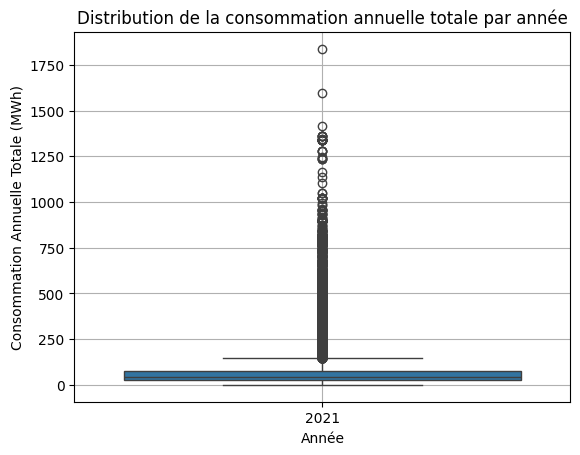

In [59]:
import seaborn as sns

# Créer un boxplot pour la consommation annuelle par année
sns.boxplot(x='annee', y='consommation_annuelle_totale_de_l_adresse_mwh', data=df_combined_enedis_clean)
plt.title("Distribution de la consommation annuelle totale par année")
plt.xlabel("Année")
plt.ylabel("Consommation Annuelle Totale (MWh)")
plt.grid(True)
plt.show()


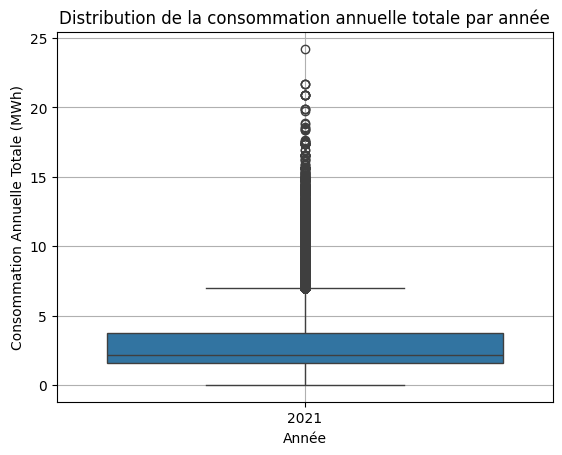

In [60]:
import seaborn as sns

# Créer un boxplot pour la consommation annuelle par année
sns.boxplot(x='annee', y='consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', data=df_combined_enedis_clean)
plt.title("Distribution de la consommation annuelle totale par année")
plt.xlabel("Année")
plt.ylabel("Consommation Annuelle Totale (MWh)")
plt.grid(True)
plt.show()


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\4001592957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean['log_conso'] = np.log1p(df_combined_enedis_clean['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'])  # log(1 + x) pour éviter log(0)


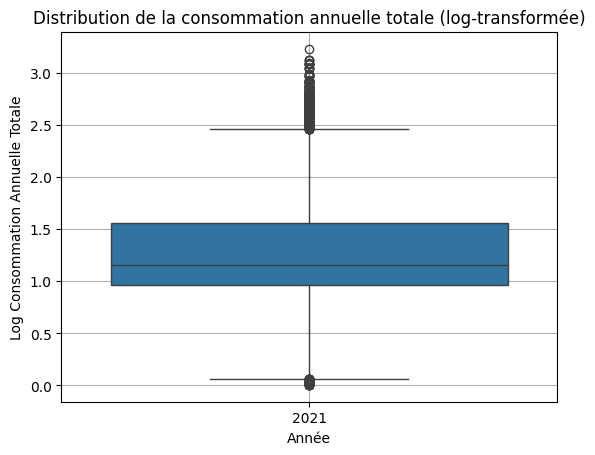

In [66]:

# Appliquer une transformation logarithmique
df_combined_enedis_clean['log_conso'] = np.log1p(df_combined_enedis_clean['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'])  # log(1 + x) pour éviter log(0)

# Afficher le boxplot après transformation logarithmique
sns.boxplot(x='annee', y='log_conso', data=df_combined_enedis_clean)
plt.title("Distribution de la consommation annuelle totale (log-transformée)")
plt.xlabel("Année")
plt.ylabel("Log Consommation Annuelle Totale")
plt.grid(True)
plt.show()


### Analyse Géographique : Comparaison des Communes

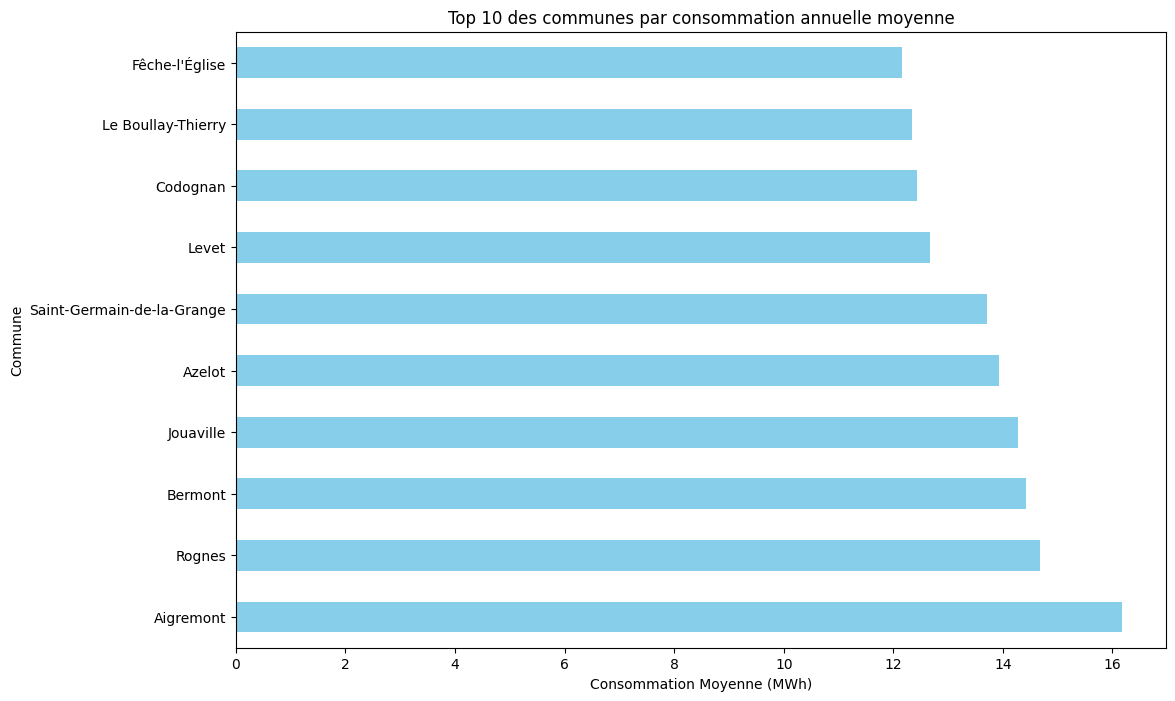

In [67]:
# Agréger la consommation moyenne par commune
consommation_par_commune = df_combined_enedis_clean.groupby('nom_commune')['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'].mean()

# Afficher les communes avec la consommation moyenne la plus élevée
top_communes = consommation_par_commune.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_communes.plot(kind='barh', color='skyblue')
plt.title("Top 10 des communes par consommation annuelle moyenne")
plt.xlabel("Consommation Moyenne (MWh)")
plt.ylabel("Commune")
plt.show()


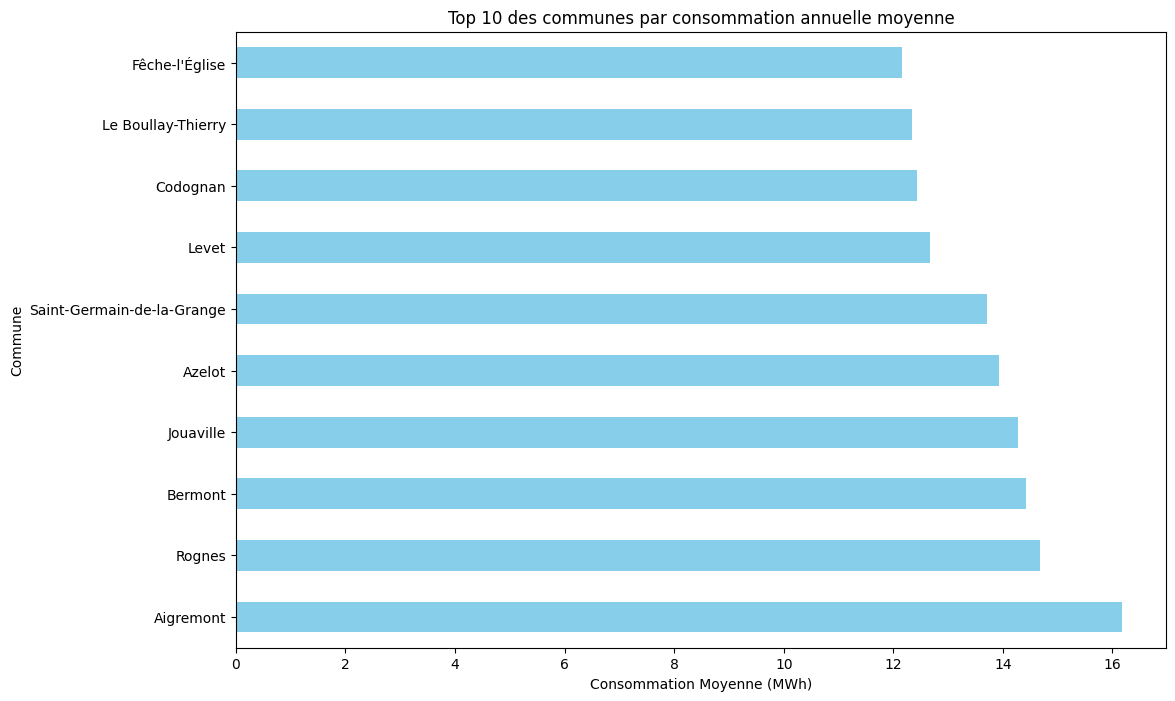

In [68]:
# Agréger la consommation moyenne par commune
consommation_par_commune = df_combined_enedis_clean.groupby('nom_commune')['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'].mean()

# Afficher les communes avec la consommation moyenne la plus élevée
top_communes = consommation_par_commune.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_communes.plot(kind='barh', color='skyblue')
plt.title("Top 10 des communes par consommation annuelle moyenne")
plt.xlabel("Consommation Moyenne (MWh)")
plt.ylabel("Commune")
plt.show()


### Analyse Démographique : Consommation par Nombre de Logements

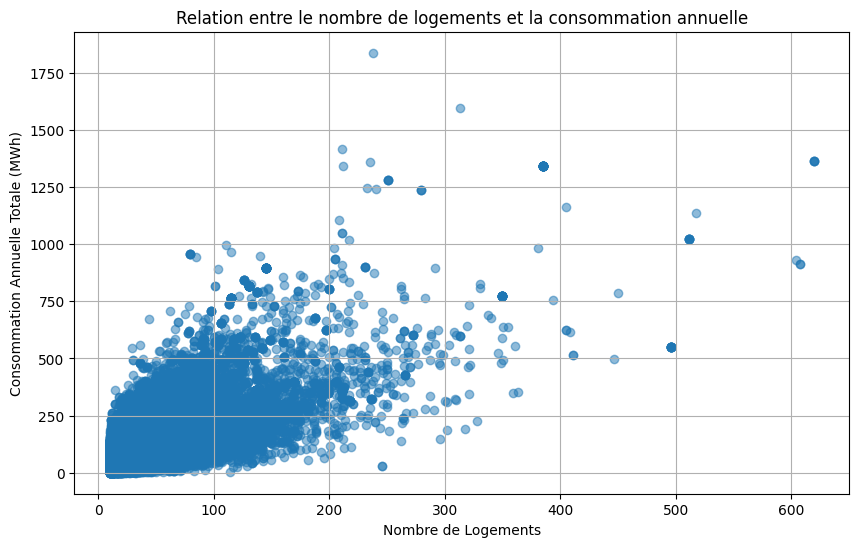

In [69]:
# Tracer la relation entre le nombre de logements et la consommation annuelle totale
plt.figure(figsize=(10, 6))
plt.scatter(df_combined_enedis_clean['nombre_de_logements'], df_combined_enedis_clean['consommation_annuelle_totale_de_l_adresse_mwh'], alpha=0.5)
plt.title("Relation entre le nombre de logements et la consommation annuelle")
plt.xlabel("Nombre de Logements")
plt.ylabel("Consommation Annuelle Totale (MWh)")
plt.grid(True)
plt.show()

In [70]:
# Liste des colonnes catégorielles
colonnes_categorielles_enedis = df_combined_enedis_clean.select_dtypes(include=['category', 'object']).columns

print("Colonnes catégorielles :", colonnes_categorielles_enedis.tolist())

Colonnes catégorielles : ['code_iris', 'nom_iris', 'indice_de_repetition', 'type_de_voie', 'libelle_de_voie', 'nom_commune', 'segment_de_client', 'adresse', 'adresse_brute', 'adresse_normalisee_insee', 'id']


In [71]:
# Sélectionner uniquement les colonnes d'intérêt
colonnes_interet = ['id', 'annee', 'consommation_annuelle_totale_de_l_adresse_mwh', 
                    'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 
                    'consommation_annuelle_moyenne_de_la_commune_mwh','adresse_normalisee_insee','nombre_de_logements'
                   ]

df_combined_enedis_clean = df_combined_enedis_clean[colonnes_interet]

# Afficher les premières lignes pour vérifier la sélection
print(df_combined_enedis_clean.head())


                   id  annee  consommation_annuelle_totale_de_l_adresse_mwh  \
0    59009_2940_00001   2021                                        335.853   
1  83061_huk8ha_00001   2021                                        248.209   
2    95491_0087_00001   2021                                         18.595   
3    95219_0807_00001   2021                                        100.702   
4    93053_5996_00001   2021                                        103.654   

   consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
0                                             10.834         
1                                              5.910         
2                                              1.860         
3                                              2.342         
4                                              2.591         

   consommation_annuelle_moyenne_de_la_commune_mwh  \
0                                            3.650   
1                                           

## Jointre ENEDIS et DPE

In [72]:

# Renommer la colonne 'Identifiant__BAN' en 'id' dans df_combined_2
df_combined_2.rename(columns={'Identifiant__BAN': 'id'}, inplace=True)
# Effectuer la jointure droite (right join) sur la colonne 'id'
df_joint = pd.merge(df_combined_2, df_combined_enedis_clean, on='id', how='inner')

# Afficher les premières lignes du DataFrame joint pour vérification
print("\nPremières lignes du DataFrame après la jointure :")
print(df_joint.head())

# # Sauvegarder le DataFrame joint dans un nouveau fichier CSV
# output_file = './fichier_jointure_dpe_enedis.csv'

# # print(f"Le DataFrame joint a été sauvegardé avec succès dans {output_file}.")

# # Si 'Date_établissement_DPE' est une date complète, extraire l'année pour créer une nouvelle colonne 'annee_etablissement_DPE'
# df_combined_2['annee_etablissement_DPE'] = pd.to_datetime(df_combined_2['Date_établissement_DPE']).dt.year

# # Faire une jointure sur 'id' et 'annee_etablissement_DPE' (ou 'annee' dans le dataset Enedis)
# df_joint = pd.merge(df_combined_2, df_combined_enedis_clean, left_on=['id', 'annee_etablissement_DPE'], right_on=['id', 'annee'], how='inner')

# # Afficher les premières lignes après la jointure
# print(df_joint.head())
# # df_joint.to_csv(output_file, index=False)



Premières lignes du DataFrame après la jointure :
   Conso_chauffage_dépensier_é_finale Nom__commune_(BAN)  \
0                              1182.2             Angers   
1                              1104.3       Cissac-Médoc   
2                              1360.1             Vannes   
3                               924.3            Le Mans   
4                              1303.8             Angers   

   Emission_GES_chauffage  Coût_total_5_usages  \
0                    85.6                528.1   
1                    75.2                566.0   
2                    75.0                417.5   
3                    51.0                358.7   
4                    88.8                555.0   

   Coordonnée_cartographique_X_(BAN)  Nombre_niveau_logement  \
0                          432058.36                     2.0   
1                          399027.53                     1.0   
2                          268119.95                     1.0   
3                          4904

In [73]:
df_joint.shape

(6811, 138)

In [74]:
# Liste des colonnes catégorielles
colonnes_categorielles = df_joint.select_dtypes(include=['category', 'object']).columns
print("Colonnes catégorielles :", colonnes_categorielles.tolist())

Colonnes catégorielles : ['Nom__commune_(BAN)', 'Type_installation_ECS_(général)', 'Catégorie_ENR', 'Adresse_(BAN)', 'Date_visite_diagnostiqueur', "Complément_d'adresse_logement", 'Date_établissement_DPE', 'N°_voie_(BAN)', 'N°DPE', 'Adresse_brute', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs', 'Statut_géocodage', 'Modèle_DPE', 'N°_département_(BAN)', 'Nom_résidence', 'Méthode_application_DPE', 'Classe_altitude', 'Indicateur_confort_été', 'Type_énergie_n°1', 'Date_réception_DPE', 'Date_fin_validité_DPE', 'Type_bâtiment', '_geopoint', 'Zone_climatique_', 'Type_installation_chauffage', 'Type_énergie_principale_chauffage', 'Qualité_isolation_enveloppe', 'Etiquette_GES', 'Etiquette_DPE', 'N°_DPE_immeuble_associé', 'Qualité_isolation_plancher_bas', 'id', 'Nom__rue_(BAN)', 'Code_INSEE_(BAN)', '_id', 'Type_énergie_n°2', 'Typologie_logement', 'Position_logement_dans_immeuble', "Complément_d'adresse_bâtiment", 'Qualité_isolation_plancher_haut_comble_aménagé', 'N°_DPE_remplacé', 'Inv

In [75]:
# Liste des colonnes numériques
colonnes_numeriques = df_joint.select_dtypes(include=['number']).columns
print("Colonnes numériques :", colonnes_numeriques.tolist())

Colonnes numériques : ['Conso_chauffage_dépensier_é_finale', 'Emission_GES_chauffage', 'Coût_total_5_usages', 'Coordonnée_cartographique_X_(BAN)', 'Nombre_niveau_logement', 'Conso_5_usages_par_m²_é_primaire', 'Coût_refroidissement', 'Ubat_W/m²_K', 'Coût_ECS_dépensier', 'Emission_GES_auxiliaires', 'Emission_GES_5_usages_par_m²', 'Emission_GES_éclairage', 'Conso_ECS_dépensier_é_finale', 'Coût_ECS', 'Coût_éclairage', 'Conso_refroidissement_é_finale', 'Conso_chauffage_é_primaire', 'Conso_éclairage_é_primaire', 'Emission_GES_5_usages_énergie_n°1', 'Nombre_appartement', 'Conso_5_usages_é_finale', 'Conso_refroidissement_é_primaire', 'N°_région_(BAN)', 'Surface_habitable_logement', 'Code_postal_(brut)', 'Coordonnée_cartographique_Y_(BAN)', '_rand', 'Emission_GES_ECS_dépensier', 'Emission_GES_refroidissement', 'Emission_GES_ECS', 'Coût_ECS_énergie_n°1', 'Conso_ECS_é_finale', 'Emission_GES_5_usages', 'Code_postal_(BAN)', 'Conso_éclairage_é_finale', 'Coût_refroidissement_dépensier', 'Emission_GES

In [76]:
# Vérification des valeurs manquantes
missing_values = df_joint.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


#### Valeur abérrante 

#### Imputer les valeurs aberrantes en les limitant aux valeurs des quartiles (Q1 et Q3)

In [77]:
import numpy as np

# Sélection des colonnes numériques valides (sans NaN ou valeurs non numériques)
colonnes_numeriques_valides = df_joint.select_dtypes(include=[np.number]).columns

# # Remplacer les valeurs manquantes par la médiane pour éviter les erreurs lors du calcul des quantiles
# df_joint[colonnes_numeriques_valides] = df_joint[colonnes_numeriques_valides].fillna(df_joint[colonnes_numeriques_valides].median())

# Calcul des quartiles et de l'IQR pour chaque colonne numérique
Q1 = df_joint[colonnes_numeriques_valides].quantile(0.25)  # Premier quartile (25%)
Q3 = df_joint[colonnes_numeriques_valides].quantile(0.75)  # Troisième quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile

# Boucle pour traiter les outliers dans chaque colonne numérique
for col in colonnes_numeriques_valides:
    lower_bound = Q1[col] - 1.5 * IQR[col]  # Borne inférieure
    upper_bound = Q3[col] + 1.5 * IQR[col]  # Borne supérieure
    # Limiter les valeurs aux bornes
    df_joint[col] = np.clip(df_joint[col], lower_bound, upper_bound)

# Vérification des résultats
print(df_joint[colonnes_numeriques_valides].describe())


       Conso_chauffage_dépensier_é_finale  Emission_GES_chauffage  \
count                         6811.000000             6811.000000   
mean                          7004.720217              968.753869   
std                           5757.718156             1065.778647   
min                              0.000000                0.000000   
25%                           2525.950000              144.200000   
50%                           5115.100000              497.500000   
75%                          10099.450000             1502.350000   
max                          21459.700000             3539.575000   

       Coût_total_5_usages  Coordonnée_cartographique_X_(BAN)  \
count          6811.000000                       6.811000e+03   
mean            913.993202                       6.558164e+05   
std             411.089529                       1.717959e+05   
min              30.000000                       2.709972e+05   
25%             610.000000                       5.72

In [78]:
# Ajout d'une colonne pour la consommation estimée par le DPE (exemple hypothétique)
df_joint['consommation_estimee_dpe_mwh'] = df_joint['Conso_5_usages_é_finale'] / 1000  # conversion en MWh 
df_joint['ecart_consommation'] = df_joint['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'] - df_joint['consommation_estimee_dpe_mwh']
# Sélectionner les colonnes spécifiques
df_selection = df_joint[['ecart_consommation', 'consommation_estimee_dpe_mwh', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'Adresse_(BAN)', 'annee']]

# Afficher les premières lignes du DataFrame sélectionné
print("\nSélection des colonnes :")
print(df_selection.head())



Sélection des colonnes :
   ecart_consommation  consommation_estimee_dpe_mwh  \
0              0.9544                        1.7906   
1              0.3043                        1.9367   
2             -0.4068                        1.9578   
3              0.1362                        1.5428   
4              0.0903                        1.8857   

   consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
0                                              2.745         
1                                              2.241         
2                                              1.551         
3                                              1.679         
4                                              1.976         

                           Adresse_(BAN)  annee  
0     4 rue isidore odorico 49100 angers   2021  
1  24 route du landat 33250 cissac-médoc   2021  
2        10 rue paul signac 56000 vannes   2021  
3         11 rue leboindre 72000 le mans   2021  
4        23 rue des 

In [79]:
# Trouver les valeurs minimale et maximale de 'ecart_consommation'
valeur_min = df_selection['ecart_consommation'].min()
valeur_max = df_selection['ecart_consommation'].max()

# Filtrer les lignes correspondant aux valeurs minimale et maximale de l'écart
ligne_min = df_selection[df_selection['ecart_consommation'] == valeur_min]
ligne_max = df_selection[df_selection['ecart_consommation'] == valeur_max]

# Afficher les résultats avec les adresses et les consommations associées
print("Ligne avec la valeur minimale de l'écart :")
print(ligne_min[['Adresse_(BAN)', 'ecart_consommation', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'consommation_estimee_dpe_mwh']])

print("\nLigne avec la valeur maximale de l'écart :")
print(ligne_max[['Adresse_(BAN)', 'ecart_consommation', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'consommation_estimee_dpe_mwh']])


Ligne avec la valeur minimale de l'écart :
                      Adresse_(BAN)  ecart_consommation  \
380  18 rue olliffe 14800 deauville          -20.704825   

     consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
380                                              0.804         

     consommation_estimee_dpe_mwh  
380                     21.508825  

Ligne avec la valeur maximale de l'écart :
                                       Adresse_(BAN)  ecart_consommation  \
64  396 avenue georges clemenceau 83330 le castellet             6.05095   

    consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
64                                            6.87425         

    consommation_estimee_dpe_mwh  
64                        0.8233  


#### Calcul du gain moyen par passage de classe DPE

In [80]:
# Moyenne de consommation par classe DPE
moyenne_consommation_par_classe = df_joint.groupby('Etiquette_DPE')['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'].mean().sort_index()
print(moyenne_consommation_par_classe)

# Calcul des gains d'énergie (en passant d'une classe à une autre)
gains_energie = moyenne_consommation_par_classe.diff().abs()
print("Gains énergétiques moyens en passant d'une classe à l'autre:")
print(gains_energie)

Etiquette_DPE
A    3.037340
B    2.036424
C    2.606571
D    2.917200
E    2.655211
F    2.682739
G    2.840252
Name: consommation_annuelle_moyenne_par_site_de_l_adresse_mwh, dtype: float64
Gains énergétiques moyens en passant d'une classe à l'autre:
Etiquette_DPE
A         NaN
B    1.000917
C    0.570147
D    0.310629
E    0.261989
F    0.027528
G    0.157513
Name: consommation_annuelle_moyenne_par_site_de_l_adresse_mwh, dtype: float64


### Combien gagne-t-on sur ses factures d’électricité (en kWh / an, voire en euros par an en prenant des hypothèses tarifaires) à passer d’une classe de DPE à une autre (ex : de G à F, ou de F à E, la valeur recherchée dépendant des classes concernées) ?

#### 1. Calculer les Consommations Moyennes par Classe DPE

In [81]:
# Calcul de la consommation moyenne par classe DPE
# Identifier la consommation électrique moyenne pour chaque classe DPE afin de mesurer les gains possibles lorsqu'on passe d'une classe à une autre.
moyenne_consommation_par_classe = df_joint.groupby('Etiquette_DPE')['consommation_annuelle_totale_de_l_adresse_mwh'].mean().sort_index()

print("Consommation moyenne par classe DPE (en MWh):")
print(moyenne_consommation_par_classe)


Consommation moyenne par classe DPE (en MWh):
Etiquette_DPE
A    74.228285
B    60.401694
C    76.569981
D    83.006714
E    71.254026
F    66.469519
G    63.805046
Name: consommation_annuelle_totale_de_l_adresse_mwh, dtype: float64


#### 2. Calculer les Gains en kWh/an

In [82]:
# Calcul des gains énergétiques en passant d'une classe à une autre
# Calculer la différence de consommation entre les classes DPE consécutives pour estimer les économies d'énergie en kWh/an.
gains_energie_kwh = moyenne_consommation_par_classe.diff().abs() * 1000  # Conversion de MWh en kWh

print("Gains énergétiques (en kWh) en passant d'une classe DPE à une autre :")
print(gains_energie_kwh)


Gains énergétiques (en kWh) en passant d'une classe DPE à une autre :
Etiquette_DPE
A             NaN
B    13826.590256
C    16168.286812
D     6436.732785
E    11752.687874
F     4784.506965
G     2664.472960
Name: consommation_annuelle_totale_de_l_adresse_mwh, dtype: float64


#### 3. Calculer les Gains en Euros/an

In [83]:
# Hypothèse tarifaire (en euros par kWh)
tarif_electricite = 0.17  # Vous pouvez ajuster ce tarif selon les données locales ou actuelles

# Calcul des gains en euros
gains_energie_euros = gains_energie_kwh * tarif_electricite

print("Gains énergétiques (en euros) en passant d'une classe DPE à une autre :")
print(gains_energie_euros)


Gains énergétiques (en euros) en passant d'une classe DPE à une autre :
Etiquette_DPE
A            NaN
B    2350.520344
C    2748.608758
D    1094.244574
E    1997.956939
F     813.366184
G     452.960403
Name: consommation_annuelle_totale_de_l_adresse_mwh, dtype: float64


#### 4.Visualisation des Gains en kWh et en Euros

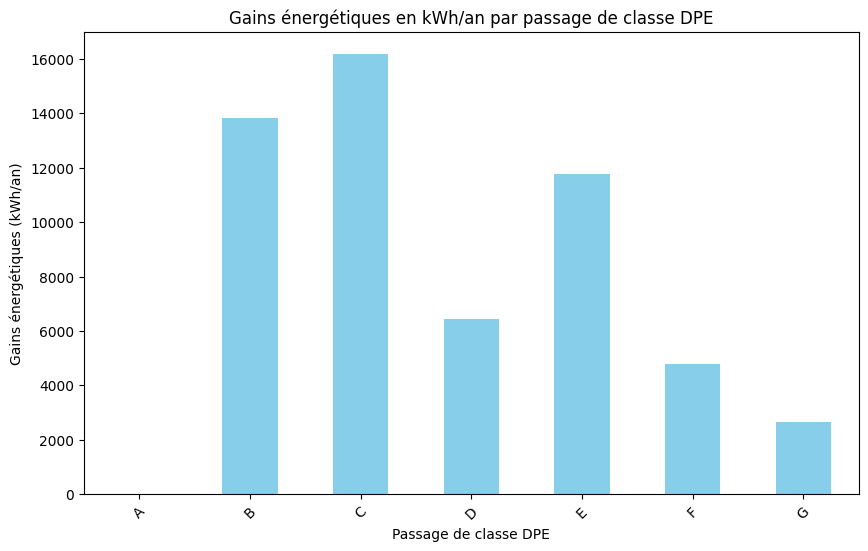

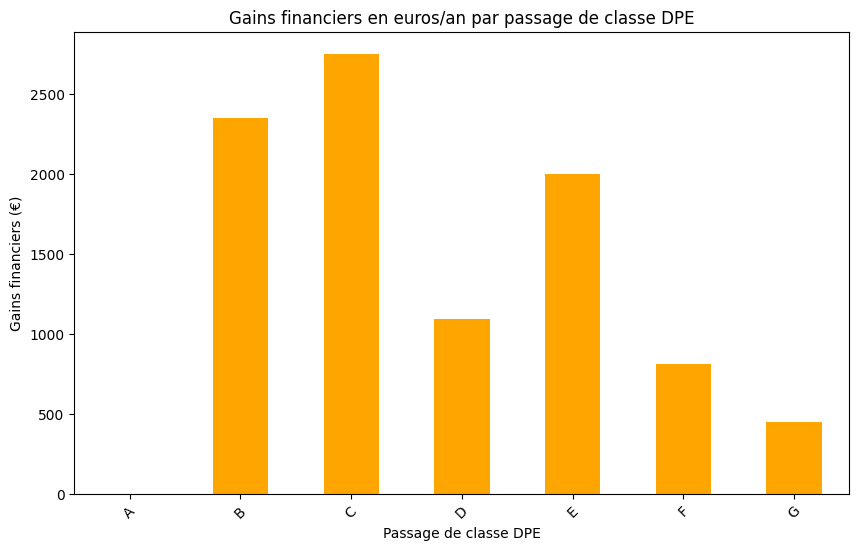

In [84]:
import matplotlib.pyplot as plt

# Visualisation des gains en kWh
plt.figure(figsize=(10, 6))
gains_energie_kwh.plot(kind='bar', color='skyblue')
plt.title("Gains énergétiques en kWh/an par passage de classe DPE")
plt.ylabel("Gains énergétiques (kWh/an)")
plt.xlabel("Passage de classe DPE")
plt.xticks(rotation=45)
plt.show()

# Visualisation des gains en euros
plt.figure(figsize=(10, 6))
gains_energie_euros.plot(kind='bar', color='orange')
plt.title("Gains financiers en euros/an par passage de classe DPE")
plt.ylabel("Gains financiers (€)")
plt.xlabel("Passage de classe DPE")
plt.xticks(rotation=45)
plt.show()


In [85]:
# Pour calculer les gains cumulés par rapport à la classe G (de G à A, par exemple)
gains_cumules_kwh = moyenne_consommation_par_classe[::-1].diff().abs().cumsum()[::-1] * 1000  # Conversion en kWh

print("Gains cumulés énergétiques (en kWh) pour un passage direct d'une classe inférieure à une classe supérieure :")
print(gains_cumules_kwh)


Gains cumulés énergétiques (en kWh) pour un passage direct d'une classe inférieure à une classe supérieure :
Etiquette_DPE
A    55633.277652
B    41806.687396
C    25638.400584
D    19201.667799
E     7448.979925
F     2664.472960
G             NaN
Name: consommation_annuelle_totale_de_l_adresse_mwh, dtype: float64


#### Analyse de Sensibilité aux Hypothèses Tarifaires

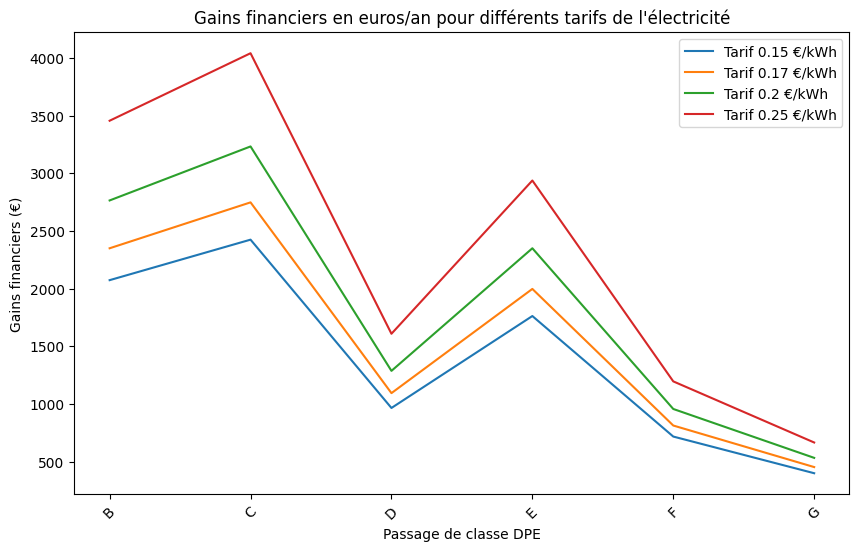

In [86]:
# Évaluer comment les gains financiers varient en fonction des différentes hypothèses tarifaires (prix du kWh). Cette analyse est importante, car le coût de l'électricité peut varier selon les périodes et les contrats.
# Liste des tarifs à analyser (en €/kWh)
tarifs = [0.15, 0.17, 0.20, 0.25]

# Calcul des gains financiers pour chaque tarif
gains_par_tarif = {}
for tarif in tarifs:
    gains_par_tarif[tarif] = gains_energie_kwh * tarif

# Visualisation des gains financiers pour différents tarifs
plt.figure(figsize=(10, 6))
for tarif, gains in gains_par_tarif.items():
    plt.plot(gains.index, gains, label=f'Tarif {tarif} €/kWh')

plt.title("Gains financiers en euros/an pour différents tarifs de l'électricité")
plt.ylabel("Gains financiers (€)")
plt.xlabel("Passage de classe DPE")
plt.legend()
plt.xticks(rotation=45)
plt.show()


#### Analyse des Gains en Fonction du Type de Chauffage

<Figure size 1400x800 with 0 Axes>

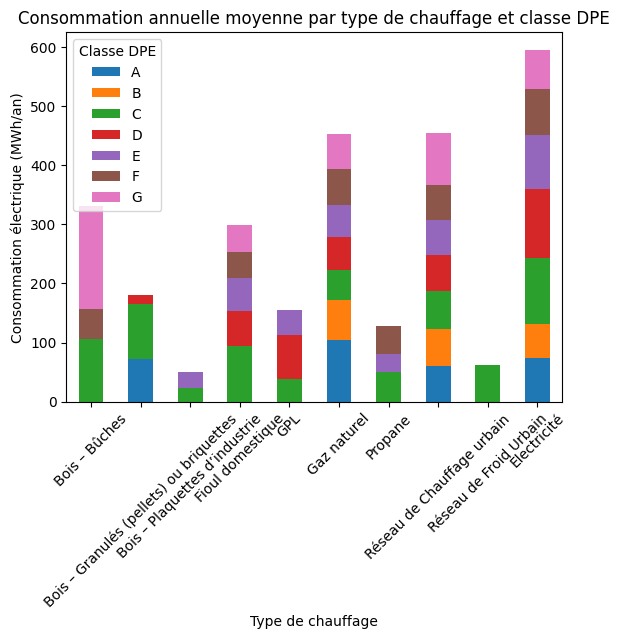

In [87]:
# Moyenne de consommation par type de chauffage et classe DPE
moyenne_par_type_chauffage = df_joint.groupby(['Type_énergie_principale_chauffage', 'Etiquette_DPE'])['consommation_annuelle_totale_de_l_adresse_mwh'].mean().unstack()

# Visualisation des gains par type de chauffage
plt.figure(figsize=(14, 8))
moyenne_par_type_chauffage.plot(kind='bar', stacked=True)
plt.title("Consommation annuelle moyenne par type de chauffage et classe DPE")
plt.ylabel("Consommation électrique (MWh/an)")
plt.xlabel("Type de chauffage")
plt.legend(title="Classe DPE")
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x800 with 0 Axes>

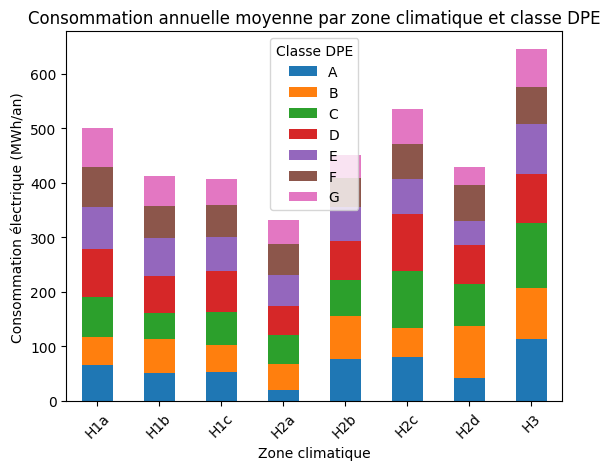

In [88]:
# Moyenne de consommation par zone climatique et classe DPE
moyenne_par_zone_climatique = df_joint.groupby(['Zone_climatique_', 'Etiquette_DPE'])['consommation_annuelle_totale_de_l_adresse_mwh'].mean().unstack()

# Visualisation des gains par zone climatique
plt.figure(figsize=(14, 8))
moyenne_par_zone_climatique.plot(kind='bar', stacked=True)
plt.title("Consommation annuelle moyenne par zone climatique et classe DPE")
plt.ylabel("Consommation électrique (MWh/an)")
plt.xlabel("Zone climatique")
plt.legend(title="Classe DPE")
plt.xticks(rotation=45)
plt.show()


In [89]:
# Liste des colonnes numériques
colonnes_numeriques = df_joint.select_dtypes(include=['object']).columns

print("Colonnes numériques :", colonnes_numeriques.tolist())

Colonnes numériques : ['Nom__commune_(BAN)', 'Type_installation_ECS_(général)', 'Catégorie_ENR', 'Adresse_(BAN)', 'Date_visite_diagnostiqueur', "Complément_d'adresse_logement", 'Date_établissement_DPE', 'N°_voie_(BAN)', 'N°DPE', 'Adresse_brute', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs', 'Statut_géocodage', 'Modèle_DPE', 'N°_département_(BAN)', 'Nom_résidence', 'Méthode_application_DPE', 'Classe_altitude', 'Indicateur_confort_été', 'Type_énergie_n°1', 'Date_réception_DPE', 'Date_fin_validité_DPE', 'Type_bâtiment', '_geopoint', 'Zone_climatique_', 'Type_installation_chauffage', 'Type_énergie_principale_chauffage', 'Qualité_isolation_enveloppe', 'Etiquette_GES', 'Etiquette_DPE', 'N°_DPE_immeuble_associé', 'Qualité_isolation_plancher_bas', 'id', 'Nom__rue_(BAN)', 'Code_INSEE_(BAN)', '_id', 'Type_énergie_n°2', 'Typologie_logement', 'Position_logement_dans_immeuble', "Complément_d'adresse_bâtiment", 'Qualité_isolation_plancher_haut_comble_aménagé', 'N°_DPE_remplacé', 'Invari

In [90]:
# Liste des colonnes numériques
colonnes_numeriques = df_joint.select_dtypes(include=['number']).columns

print("Colonnes numériques :", colonnes_numeriques.tolist())

Colonnes numériques : ['Conso_chauffage_dépensier_é_finale', 'Emission_GES_chauffage', 'Coût_total_5_usages', 'Coordonnée_cartographique_X_(BAN)', 'Nombre_niveau_logement', 'Conso_5_usages_par_m²_é_primaire', 'Coût_refroidissement', 'Ubat_W/m²_K', 'Coût_ECS_dépensier', 'Emission_GES_auxiliaires', 'Emission_GES_5_usages_par_m²', 'Emission_GES_éclairage', 'Conso_ECS_dépensier_é_finale', 'Coût_ECS', 'Coût_éclairage', 'Conso_refroidissement_é_finale', 'Conso_chauffage_é_primaire', 'Conso_éclairage_é_primaire', 'Emission_GES_5_usages_énergie_n°1', 'Nombre_appartement', 'Conso_5_usages_é_finale', 'Conso_refroidissement_é_primaire', 'N°_région_(BAN)', 'Surface_habitable_logement', 'Code_postal_(brut)', 'Coordonnée_cartographique_Y_(BAN)', '_rand', 'Emission_GES_ECS_dépensier', 'Emission_GES_refroidissement', 'Emission_GES_ECS', 'Coût_ECS_énergie_n°1', 'Conso_ECS_é_finale', 'Emission_GES_5_usages', 'Code_postal_(BAN)', 'Conso_éclairage_é_finale', 'Coût_refroidissement_dépensier', 'Emission_GES

In [91]:
enedis_21_dpe=df_joint.copy()
enedis_21_dpe.shape

(6811, 140)

## Jointure enedis 2022 Vs DPE 2022

In [93]:
# Définir les chemins des fichiers DPE neufs

file_path_neuf_2022 = './Fichiers_Sources/dpe_logements_neufs_2022.csv'
df_neuf_2022 = pd.read_csv(file_path_neuf_2022)
# Définir les chemins des fichiers DPE existants

file_path_existant_22 = './Fichiers_Sources/dpe_logements_existants_2022.csv'
df_existant_22 = pd.read_csv(file_path_existant_22)

C:\Users\33780\AppData\Local\Temp\ipykernel_33360\2517362806.py:4: DtypeWarning: Columns (114,116,117,126,127,133) have mixed types. Specify dtype option on import or set low_memory=False.
  df_neuf_2022 = pd.read_csv(file_path_neuf_2022)
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\2517362806.py:8: DtypeWarning: Columns (38,96,229,231,235,236,237,238,243) have mixed types. Specify dtype option on import or set low_memory=False.
  df_existant_22 = pd.read_csv(file_path_existant_22)


In [94]:
#j'ai ajouté une colonne type batiment pour chaque df pour distinguer apres la concaténation (si on veut filtrer )
df_neuf_2022['type_batiment_add'] = 'neuf'
df_existant_22['type_batiment_add'] = 'existant'
# Trouver les colonnes communes entre les deux DataFrames
colonnes_communes = df_neuf_2022.columns.intersection(df_existant_22.columns)
# Concaténer uniquement les colonnes communes
df_final_combined_22 = pd.concat([df_neuf_2022[colonnes_communes], df_existant_22[colonnes_communes]], ignore_index=True)
# Vérifier le résultat
print(df_final_combined_22.head())

   Conso_chauffage_dépensier_é_finale Nom__commune_(BAN)  \
0                              1859.6      Dives-sur-Mer   
1                              1503.4      Doué-en-Anjou   
2                               299.7           Toulouse   
3                              1303.3  Beaussais-sur-Mer   
4                               923.7           Valognes   

   Emission_GES_chauffage  Coût_total_5_usages  \
0                   126.6                486.0   
1                   102.4                430.0   
2                    20.4                494.5   
3                    88.8                410.4   
4                    62.9                365.0   

   Coordonnée_cartographique_X_(BAN)  Nombre_niveau_logement  \
0                          475046.07                     1.0   
1                          445250.11                     1.0   
2                          571753.44                     1.0   
3                          320828.51                     1.0   
4                 

In [95]:
# Grouper par Adresse, Identifiant et Date
doublons_groupes_date_22 = df_final_combined_22.groupby(['Identifiant__BAN']).size().reset_index(name='counts')

# Filtrer les groupes avec plus d'une occurrence
doublons_groupes_date_22 = doublons_groupes_date_22[doublons_groupes_date_22['counts'] > 1]

print(doublons_groupes_date_22)


       Identifiant__BAN  counts
0            01001_0045       2
1      01004_0035_00007       2
2      01004_0040_00079       7
3      01004_0040_00096       2
4      01004_0040_00179       8
...                 ...     ...
84772        97232_0378       2
84780        97414_0700       6
84782        97415_A210       2
84784        97416_0940       2
84788      97502_ngctk0       6

[42131 rows x 2 columns]


In [96]:
# Garder la dernière occurrence pour chaque 'Identifiant__BAN'
df_sans_doublons_22 = df_final_combined_22.drop_duplicates(subset=['Identifiant__BAN'], keep='last')

# Affichage du DataFrame sans doublons
print(df_sans_doublons_22)

        Conso_chauffage_dépensier_é_finale     Nom__commune_(BAN)  \
5                                   2135.6               Marmagne   
8                                    936.1           Saint-Urbain   
9                                   2164.6              Itteville   
11                                  1024.8  Castellare-di-Casinca   
13                                  1553.2         Basse-Goulaine   
...                                    ...                    ...   
197285                             22166.3             Argenteuil   
197286                              8103.2                 Clichy   
197287                             15505.2      Valence-sur-Baïse   
197288                              1949.1                   Agde   
197289                              5163.1  Boutiers-Saint-Trojan   

        Emission_GES_chauffage  Coût_total_5_usages  \
5                        145.4                537.0   
8                         63.8                373.0   
9     

In [97]:
df_sans_doublons_22.shape

(84790, 133)

In [98]:
seuil = 90
colonnes_a_supprimer = missing_values[missing_values > seuil].index
df_sans_doublons_22 = df_sans_doublons_22.drop(columns=colonnes_a_supprimer)

print(f"Colonnes supprimées : {colonnes_a_supprimer.tolist()}")


Colonnes supprimées : []


In [99]:
# Imputer avec la médiane pour les colonnes numériques
num_cols = df_sans_doublons_22.select_dtypes(include=['number']).columns
for col in num_cols :
    df_sans_doublons_22[col].fillna(df_sans_doublons_22[col].median(), inplace=True)
# Imputer avec la valeur la plus fréquente pour les colonnes catégorielles
cat_cols = df_sans_doublons_22.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    df_sans_doublons_22[col].fillna(df_sans_doublons_22[col].mode()[0], inplace=True)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\1581313381.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sans_doublons_22[col].fillna(df_sans_doublons_22[col].median(), inplace=True)
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\1581313381.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [100]:
# Supprimer les lignes ayant plus de 50% de valeurs manquantes
seuil_lignes = 50
df_combined_22 = df_sans_doublons_22[df_sans_doublons_22.isnull().mean(axis=1) < (seuil_lignes / 100)]

print(f"Nombre de lignes après suppression : {len(df_combined_22)}")


Nombre de lignes après suppression : 84790


In [101]:
# Vérification des valeurs manquantes restantes
missing_values_restantes = df_combined_22.isnull().mean() * 100
print(missing_values_restantes[missing_values_restantes > 0])
df_combined_22 = df_combined_22.drop(columns=['_score'])

_score    100.0
dtype: float64


In [102]:
# Calcul des quartiles (Q1 et Q3) et de l'IQR (Interquartile Range)
Q1 = df_combined_22['Conso_5_usages_é_finale'].quantile(0.25)
Q3 = df_combined_22['Conso_5_usages_é_finale'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes (outliers)
outliers = df_combined_22[(df_combined_22['Conso_5_usages_é_finale'] < lower_bound) | (df_combined_22['Conso_5_usages_é_finale'] > upper_bound)]

# Remplacer les valeurs en dehors des limites par Q1 ou Q3
df_combined_22['Conso_5_usages_é_finale'] = df_combined_22['Conso_5_usages_é_finale'].apply(
    lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
)

# Vérifier le résultat
print(df_combined_22['Conso_5_usages_é_finale'].describe())


count    84790.000000
mean      5218.624974
std       3686.661889
min          0.000000
25%       2237.825000
50%       3869.700000
75%       8248.356250
max      17263.500000
Name: Conso_5_usages_é_finale, dtype: float64


In [103]:
# Identifier les doublons en fonction de 'id', 'annee', et 'adresse'
doublons = Enedis_22[Enedis_22.duplicated(subset=['id', 'annee', 'adresse'], keep=False)]

# Grouper les doublons par 'annee' et 'adresse', et compter le nombre de doublons pour chaque groupe
grouped_doublons = doublons.groupby(['annee', 'adresse','id']).size().reset_index(name='nombre_de_doublons')

# Filtrer pour les adresses ayant plus d'une occurrence dans la même année (plus d'un doublon)
grouped_doublons = grouped_doublons[grouped_doublons['nombre_de_doublons'] > 1]

# Afficher le résultat
print(grouped_doublons)


       annee                    adresse                  id  \
0       2022       1 ALLEE ALBERT CAMUS    92032_0025_00001   
1       2022             1 ALLEE AMPERE    92078_0038_00001   
2       2022  1 ALLEE ANTOINE BOURDELLE  92023_cl0c11_00001   
3       2022     1 ALLEE ANTOINE PORTAL    92023_0072_00001   
4       2022    1 ALLEE ANTOINE WATTEAU    92020_9700_00001   
...      ...                        ...                 ...   
17738   2022      99 RUE LOUIS ROUQUIER    92044_5170_00099   
17739   2022     99 RUE MARCEL DASSAULT    92012_6147_00099   
17740   2022              99 RUE MARTRE    92024_6140_00099   
17741   2022               99 RUE RIVAY    92044_8150_00099   
17742   2022      99 RUE YOURI GAGARINE    92025_9970_00099   

       nombre_de_doublons  
0                       2  
1                       2  
2                       2  
3                       2  
4                       2  
...                   ...  
17738                   2  
17739              

In [104]:
# Supprimer les doublons en gardant uniquement la première occurrence pour chaque combinaison 'id' et 'annee'
df_combined_enedis_clean_22 = Enedis_22.drop_duplicates(subset=['id'], keep='first')

# Vérifier le résultat
print(f"Nombre de lignes après suppression des doublons : {df_combined_enedis_clean.shape[0]}")
print(df_combined_enedis_clean_22.head())


Nombre de lignes après suppression des doublons : 231082
   annee  code_iris             nom_iris  numero_de_voie  \
0   2022  590090206              Château               1   
1   2022  830610116         Tour de Mare               1   
2   2022  954910103        Saint-Nicolas               1   
3   2022  952190202      Les Passerelles               1   
4   2022  930530106  Centre Ville Gare 3               1   

   indice_de_repetition type_de_voie  libelle_de_voie  code_commune  \
0                   NaN        ALLEE       CHANTECLER         59009   
1                   NaN        ALLEE      DE BELLEVUE         83061   
2                   NaN        ALLEE     DE CHAMPAGNE         95491   
3                   NaN        ALLEE      DE LA FORET         95219   
4                   NaN        ALLEE  DE LA MADELEINE         93053   

           nom_commune segment_de_client  ...  \
0    Villeneuve-d'Ascq       RESIDENTIEL  ...   
1               Fréjus       RESIDENTIEL  ...   
2  Le Pl

In [105]:

# Calculer le mode de 'type_de_voie'
mode_type_de_voie = df_combined_enedis_clean_22['type_de_voie'].mode()[0]
df_combined_enedis_clean_22['indice_de_repetition'] = df_combined_enedis_clean_22['indice_de_repetition'].fillna('')
df_combined_enedis_clean_22['type_de_voie'] = df_combined_enedis_clean_22['type_de_voie'].fillna(mode_type_de_voie)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3933272260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean_22['indice_de_repetition'] = df_combined_enedis_clean_22['indice_de_repetition'].fillna('')
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3933272260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean_22['type_de_voie'] = df_combined_enedis_clean_22['type_de_voie'].fillna(mode_type_de_voie)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\666335411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean_22['log_conso'] = np.log1p(df_combined_enedis_clean_22['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'])  # log(1 + x) pour éviter log(0)


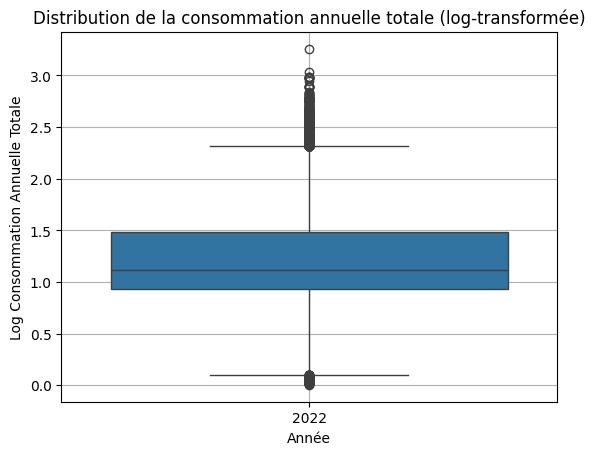

In [106]:

# Appliquer une transformation logarithmique
df_combined_enedis_clean_22['log_conso'] = np.log1p(df_combined_enedis_clean_22['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'])  # log(1 + x) pour éviter log(0)

# Afficher le boxplot après transformation logarithmique
sns.boxplot(x='annee', y='log_conso', data=df_combined_enedis_clean_22)
plt.title("Distribution de la consommation annuelle totale (log-transformée)")
plt.xlabel("Année")
plt.ylabel("Log Consommation Annuelle Totale")
plt.grid(True)
plt.show()


In [107]:
df_combined_enedis_clean_22 = df_combined_enedis_clean_22[colonnes_interet]

# Renommer la colonne 'Identifiant__BAN' en 'id' dans df_combined_2
df_combined_22.rename(columns={'Identifiant__BAN': 'id'}, inplace=True)
# Effectuer la jointure droite (right join) sur la colonne 'id'
df_joint_22= pd.merge(df_combined_22, df_combined_enedis_clean_22, on='id', how='inner')

# Afficher les premières lignes du DataFrame joint pour vérification
print("\nPremières lignes du DataFrame après la jointure :")
print(df_joint_22.head())



Premières lignes du DataFrame après la jointure :
   Conso_chauffage_dépensier_é_finale             Nom__commune_(BAN)  \
0                              1518.5                       Léguevin   
1                              1476.7                          Massy   
2                              1374.5  Saint-Maximin-la-Sainte-Baume   
3                              1568.3              Saint-Cyr-sur-Mer   
4                              1199.4                      Missillac   

   Emission_GES_chauffage  Coût_total_5_usages  \
0                   103.4                503.2   
1                   100.6                614.0   
2                    93.6                433.3   
3                   106.8                456.0   
4                    81.7                406.8   

   Coordonnée_cartographique_X_(BAN)  Nombre_niveau_logement  \
0                          556747.06                     1.0   
1                          645723.79                     1.0   
2                      

In [486]:
df_joint_22.shape

(6691, 138)

In [108]:

# Ajout d'une colonne pour la consommation estimée par le DPE (exemple hypothétique)
df_joint_22['consommation_estimee_dpe_mwh'] = df_joint_22['Conso_5_usages_é_finale'] / 1000  # conversion en MWh 
df_joint_22['ecart_consommation'] = df_joint_22['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'] - df_joint_22['consommation_estimee_dpe_mwh']
# Sélectionner les colonnes spécifiques
df_selection_22 = df_joint_22[['ecart_consommation', 'consommation_estimee_dpe_mwh', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'Adresse_(BAN)', 'annee']]

# Afficher les premières lignes du DataFrame sélectionné
print("\nSélection des colonnes :")
print(df_selection_22.head())



Sélection des colonnes :
   ecart_consommation  consommation_estimee_dpe_mwh  \
0              0.7030                        2.5120   
1             -1.8636                        3.2166   
2              5.6937                        2.0213   
3              5.1577                        2.1763   
4              1.4760                        1.8330   

   consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
0                                              3.215         
1                                              1.353         
2                                              7.715         
3                                              7.334         
4                                              3.309         

                                       Adresse_(BAN)  annee  
0                    2 Rue Monplaisir 31490 Léguevin   2022  
1                 5 Rue Florence Arthaud 91300 Massy   2022  
2  2539 Chemin du Moulin 83470 Saint-Maximin-la-S...   2022  
3    143 Route de la C

In [109]:
# Trouver les valeurs minimale et maximale de 'ecart_consommation'
valeur_min = df_selection_22['ecart_consommation'].min()
valeur_max = df_selection_22['ecart_consommation'].max()

# Filtrer les lignes correspondant aux valeurs minimale et maximale de l'écart
ligne_min = df_selection_22[df_selection_22['ecart_consommation'] == valeur_min]
ligne_max = df_selection_22[df_selection_22['ecart_consommation'] == valeur_max]

# Afficher les résultats avec les adresses et les consommations associées
print("Ligne avec la valeur minimale de l'écart :")
print(ligne_min[['Adresse_(BAN)', 'ecart_consommation', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'consommation_estimee_dpe_mwh']])

print("\nLigne avec la valeur maximale de l'écart :")
print(ligne_max[['Adresse_(BAN)', 'ecart_consommation', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'consommation_estimee_dpe_mwh']])


Ligne avec la valeur minimale de l'écart :
                           Adresse_(BAN)  ecart_consommation  \
2524  2 Rue Arthur Rimbaud 18000 Bourges            -16.1422   

      consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
2524                                              0.705         

      consommation_estimee_dpe_mwh  
2524                       16.8472  

Ligne avec la valeur maximale de l'écart :
                                          Adresse_(BAN)  ecart_consommation  \
1044  1054 Chemin du Moulin 83470 Saint-Maximin-la-S...             16.7019   

      consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
1044                                             18.723         

      consommation_estimee_dpe_mwh  
1044                        2.0211  


### Join enedis dpe 2023

In [111]:
# Définir les chemins des fichiers DPE neufs

file_path_neuf_2023 = './Fichiers_Sources/dpe_logements_neufs_2023.csv'
df_neuf_2023 = pd.read_csv(file_path_neuf_2023)
# Définir les chemins des fichiers DPE existants

file_path_existant_23 = './Fichiers_Sources/dpe_logements_existants_2023.csv'
df_existant_23 = pd.read_csv(file_path_existant_23)

C:\Users\33780\AppData\Local\Temp\ipykernel_33360\414394831.py:4: DtypeWarning: Columns (113,116,126,127,133) have mixed types. Specify dtype option on import or set low_memory=False.
  df_neuf_2023 = pd.read_csv(file_path_neuf_2023)
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\414394831.py:8: DtypeWarning: Columns (38,73,96,165,201,229,230,231,235,236,237,238,243) have mixed types. Specify dtype option on import or set low_memory=False.
  df_existant_23 = pd.read_csv(file_path_existant_23)


In [112]:
#j'ai ajouté une colonne type batiment pour chaque df pour distinguer apres la concaténation (si on veut filtrer )
df_neuf_2023['type_batiment_add'] = 'neuf'
df_existant_23['type_batiment_add'] = 'existant'
# Trouver les colonnes communes entre les deux DataFrames
colonnes_communes = df_neuf_2023.columns.intersection(df_existant_23.columns)
# Concaténer uniquement les colonnes communes
df_final_combined_23 = pd.concat([df_neuf_2023[colonnes_communes], df_existant_23[colonnes_communes]], ignore_index=True)
# Vérifier le résultat
print(df_final_combined_23.head())

   Conso_chauffage_dépensier_é_finale  Nom__commune_(BAN)  \
0                               832.2    Corbeil-Essonnes   
1                              2104.2     Le Molay-Littry   
2                              1382.7     Hersin-Coupigny   
3                                 0.0             Limoges   
4                              1338.0  Courville-sur-Eure   

   Emission_GES_chauffage  Coût_total_5_usages  \
0                    45.9                346.1   
1                   143.3                546.0   
2                    94.2                430.0   
3                     0.0                 48.2   
4                    91.1                420.9   

   Coordonnée_cartographique_X_(BAN)  Nombre_niveau_logement  \
0                          660389.67                     4.0   
1                          418154.68                     1.0   
2                          672695.03                     1.0   
3                          566183.94                     1.0   
4           

In [113]:
# Grouper par Adresse, Identifiant et Date
doublons_groupes_date_23 = df_final_combined_23.groupby(['Identifiant__BAN']).size().reset_index(name='counts')

# Filtrer les groupes avec plus d'une occurrence
doublons_groupes_date_23 = doublons_groupes_date_23[doublons_groupes_date_23['counts'] > 1]

print(doublons_groupes_date_23)


        Identifiant__BAN  counts
0                  01001       3
1       01004_0040_00079       2
2       01004_0060_00031       2
5       01004_0120_00014       2
8       01004_0220_00007       2
...                  ...     ...
187558  97309_0417_00022       2
187560      97357_mjqwhr       2
187566        97414_0700       3
187572        97416_0940       2
187574      97502_ngctk0      10

[109040 rows x 2 columns]


In [114]:
# Garder la dernière occurrence pour chaque 'Identifiant__BAN'
df_sans_doublons_23 = df_final_combined_23.drop_duplicates(subset=['Identifiant__BAN'], keep='last')

# Affichage du DataFrame sans doublons
print(df_sans_doublons_23)

        Conso_chauffage_dépensier_é_finale      Nom__commune_(BAN)  \
4                                   1338.0      Courville-sur-Eure   
7                                   1307.7        Saint-Allouestre   
9                                   1431.0         Hettange-Grande   
11                                   953.5                Cadaujac   
14                                  1460.3    Montreuil-sur-Brêche   
...                                    ...                     ...   
437895                              5078.7              Courbevoie   
437896                              7542.5                Bonneval   
437897                               348.0  Illkirch-Graffenstaden   
437898                             15884.8      Châlette-sur-Loing   
437899                              3475.3                  Fréjus   

        Emission_GES_chauffage  Coût_total_5_usages  \
4                         91.1                420.9   
7                         72.1                476

In [115]:
df_sans_doublons_23.shape

(187577, 133)

In [116]:
seuil = 90
colonnes_a_supprimer = missing_values[missing_values > seuil].index
df_sans_doublons_23 = df_sans_doublons_23.drop(columns=colonnes_a_supprimer)

print(f"Colonnes supprimées : {colonnes_a_supprimer.tolist()}")


Colonnes supprimées : []


In [117]:
# Imputer avec la médiane pour les colonnes numériques
num_cols = df_sans_doublons_23.select_dtypes(include=['number']).columns
for col in num_cols :
    df_sans_doublons_23[col].fillna(df_sans_doublons_23[col].median(), inplace=True)
# Imputer avec la valeur la plus fréquente pour les colonnes catégorielles
cat_cols = df_sans_doublons_23.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    df_sans_doublons_23[col].fillna(df_sans_doublons_23[col].mode()[0], inplace=True)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\4208952818.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sans_doublons_23[col].fillna(df_sans_doublons_23[col].median(), inplace=True)
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\4208952818.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [118]:
# Vérification des valeurs manquantes restantes
missing_values_restantes = df_sans_doublons_23.isnull().mean() * 100
print(missing_values_restantes[missing_values_restantes > 0])
df_sans_doublons_23 = df_sans_doublons_23.drop(columns=['_score'])

_score    100.0
dtype: float64


In [119]:
# Calcul des quartiles (Q1 et Q3) et de l'IQR (Interquartile Range)
Q1 = df_sans_doublons_23['Conso_5_usages_é_finale'].quantile(0.25)
Q3 = df_sans_doublons_23['Conso_5_usages_é_finale'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes (outliers)
outliers = df_sans_doublons_23[(df_combined_22['Conso_5_usages_é_finale'] < lower_bound) | (df_sans_doublons_23['Conso_5_usages_é_finale'] > upper_bound)]

# Remplacer les valeurs en dehors des limites par Q1 ou Q3
df_sans_doublons_23['Conso_5_usages_é_finale'] = df_sans_doublons_23['Conso_5_usages_é_finale'].apply(
    lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
)

# Vérifier le résultat
print(df_sans_doublons_23['Conso_5_usages_é_finale'].describe())


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3521585455.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_sans_doublons_23[(df_combined_22['Conso_5_usages_é_finale'] < lower_bound) | (df_sans_doublons_23['Conso_5_usages_é_finale'] > upper_bound)]


count    187577.000000
mean       7676.011452
std        5251.380176
min           0.000000
25%        3252.400000
50%        6360.400000
75%       11742.000000
max       24476.200000
Name: Conso_5_usages_é_finale, dtype: float64


In [120]:
# Identifier les doublons en fonction de 'id', 'annee', et 'adresse'
doublons = Enedis_23[Enedis_23.duplicated(subset=['id', 'annee', 'adresse'], keep=False)]

# Grouper les doublons par 'annee' et 'adresse', et compter le nombre de doublons pour chaque groupe
grouped_doublons23 = doublons.groupby(['annee', 'adresse','id']).size().reset_index(name='nombre_de_doublons')

# Filtrer pour les adresses ayant plus d'une occurrence dans la même année (plus d'un doublon)
grouped_doublons23 = grouped_doublons23[grouped_doublons23['nombre_de_doublons'] > 1]

# Afficher le résultat
print(grouped_doublons23)


       annee                    adresse                  id  \
0       2023       1 ALLEE ALBERT CAMUS    92032_0025_00001   
1       2023             1 ALLEE AMPERE    92078_0038_00001   
2       2023  1 ALLEE ANTOINE BOURDELLE  92023_cl0c11_00001   
3       2023     1 ALLEE ANTOINE PORTAL    92023_0072_00001   
4       2023    1 ALLEE ANTOINE WATTEAU    92020_9700_00001   
...      ...                        ...                 ...   
17881   2023      99 RUE LOUIS ROUQUIER    92044_5170_00099   
17882   2023     99 RUE MARCEL DASSAULT    92012_6147_00099   
17883   2023              99 RUE MARTRE    92024_6140_00099   
17884   2023               99 RUE RIVAY    92044_8150_00099   
17885   2023      99 RUE YOURI GAGARINE    92025_9970_00099   

       nombre_de_doublons  
0                       2  
1                       2  
2                       2  
3                       2  
4                       2  
...                   ...  
17881                   2  
17882              

In [121]:
# Supprimer les doublons en gardant uniquement la première occurrence pour chaque combinaison 'id' et 'annee'
df_combined_enedis_clean_23 = Enedis_23.drop_duplicates(subset=['id'], keep='first')

# Vérifier le résultat
print(f"Nombre de lignes après suppression des doublons : {df_combined_enedis_clean_23.shape[0]}")
print(df_combined_enedis_clean_23.head())
df_combined_enedis_clean_23.shape

Nombre de lignes après suppression des doublons : 230978
   annee  code_iris             nom_iris  numero_de_voie  \
0   2023  590090206              Château               1   
1   2023  830610116         Tour de Mare               1   
2   2023  954910103        Saint-Nicolas               1   
3   2023  952190202      Les Passerelles               1   
4   2023  930530106  Centre Ville Gare 3               1   

   indice_de_repetition type_de_voie  libelle_de_voie  code_commune  \
0                   NaN        ALLEE       CHANTECLER         59009   
1                   NaN        ALLEE      DE BELLEVUE         83061   
2                   NaN        ALLEE     DE CHAMPAGNE         95491   
3                   NaN        ALLEE      DE LA FORET         95219   
4                   NaN        ALLEE  DE LA MADELEINE         93053   

           nom_commune segment_de_client  ...  \
0    Villeneuve-d'Ascq       RESIDENTIEL  ...   
1               Fréjus       RESIDENTIEL  ...   
2  Le Pl

(230978, 22)

In [122]:

# Calculer le mode de 'type_de_voie'
mode_type_de_voie = df_combined_enedis_clean_23['type_de_voie'].mode()[0]
df_combined_enedis_clean_23['indice_de_repetition'] = df_combined_enedis_clean_23['indice_de_repetition'].fillna('')
df_combined_enedis_clean_23['type_de_voie'] = df_combined_enedis_clean_23['type_de_voie'].fillna(mode_type_de_voie)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\2737413586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean_23['indice_de_repetition'] = df_combined_enedis_clean_23['indice_de_repetition'].fillna('')
C:\Users\33780\AppData\Local\Temp\ipykernel_33360\2737413586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean_23['type_de_voie'] = df_combined_enedis_clean_23['type_de_voie'].fillna(mode_type_de_voie)


C:\Users\33780\AppData\Local\Temp\ipykernel_33360\3789405384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_enedis_clean_23['log_conso'] = np.log1p(df_combined_enedis_clean_23['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'])  # log(1 + x) pour éviter log(0)


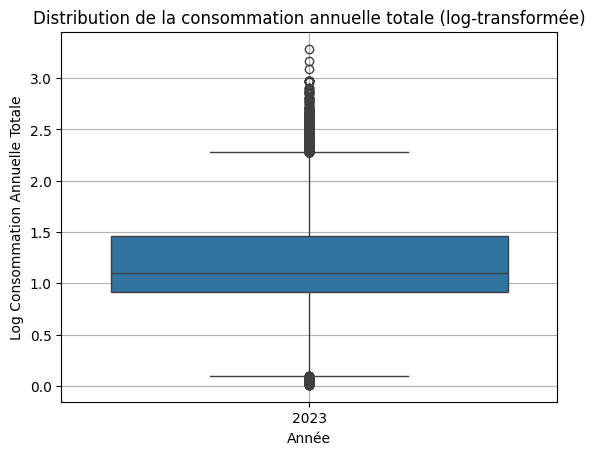

In [123]:
# Appliquer une transformation logarithmique
df_combined_enedis_clean_23['log_conso'] = np.log1p(df_combined_enedis_clean_23['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'])  # log(1 + x) pour éviter log(0)
# Afficher le boxplot après transformation logarithmique
sns.boxplot(x='annee', y='log_conso', data=df_combined_enedis_clean_23)
plt.title("Distribution de la consommation annuelle totale (log-transformée)")
plt.xlabel("Année")
plt.ylabel("Log Consommation Annuelle Totale")
plt.grid(True)
plt.show()


In [124]:
df_combined_enedis_clean_23 = df_combined_enedis_clean_23[colonnes_interet]
df_combined_23=df_sans_doublons_23.copy()
# Renommer la colonne 'Identifiant__BAN' en 'id' dans df_combined_2
df_combined_23.rename(columns={'Identifiant__BAN': 'id'}, inplace=True)
# Effectuer la jointure droite (right join) sur la colonne 'id'
df_joint_23= pd.merge(df_combined_23, df_combined_enedis_clean_23, on='id', how='inner')

# Afficher les premières lignes du DataFrame joint pour vérification
print("\nPremières lignes du DataFrame après la jointure :")
print(df_joint_23.head())
df_joint_23.shape


Premières lignes du DataFrame après la jointure :
   Conso_chauffage_dépensier_é_finale       Nom__commune_(BAN)  \
0                               495.7               Marseillan   
1                              2190.1                     Isle   
2                              5932.2      Caumont-sur-Durance   
3                              1537.0  Saint-Jean-de-la-Ruelle   
4                              1264.3               Bouguenais   

   Emission_GES_chauffage  Coût_total_5_usages  \
0                    33.8                385.4   
1                   149.2                531.0   
2                   404.0               2950.0   
3                   104.7                468.0   
4                    86.1                452.5   

   Coordonnée_cartographique_X_(BAN)  Nombre_niveau_logement  \
0                          743198.41                     1.0   
1                          562437.78                     1.0   
2                          856951.96                     1.

(19366, 138)

In [125]:
# Ajout d'une colonne pour la consommation estimée par le DPE (exemple hypothétique)
df_joint_23['consommation_estimee_dpe_mwh'] = df_joint_23['Conso_5_usages_é_finale'] / 1000  # conversion en MWh 
df_joint_23['ecart_consommation'] = df_joint_23['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'] - df_joint_23['consommation_estimee_dpe_mwh']
# Sélectionner les colonnes spécifiques
df_selection_23 = df_joint_23[['ecart_consommation', 'consommation_estimee_dpe_mwh', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'Adresse_(BAN)', 'annee']]

# Afficher les premières lignes du DataFrame sélectionné
print("\nSélection des colonnes :")
print(df_selection_23.head())


Sélection des colonnes :
   ecart_consommation  consommation_estimee_dpe_mwh  \
0             -0.4996                        1.3286   
1             -1.4882                        2.6932   
2            -10.5091                       11.4391   
3              2.7332                        2.2598   
4              0.4265                        2.0955   

   consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
0                                              0.829         
1                                              1.205         
2                                              0.930         
3                                              4.993         
4                                              2.522         

                                       Adresse_(BAN)  annee  
0                 3 Rue du Corinthe 34340 Marseillan   2023  
1                       14 Rue du Cluzeau 87170 Isle   2023  
2         59 Route du Thor 84510 Caumont-sur-Durance   2023  
3  7 Rue Olympe de Gou

In [126]:
# Trouver les valeurs minimale et maximale de 'ecart_consommation'
valeur_min = df_selection_23['ecart_consommation'].min()
valeur_max = df_selection_23['ecart_consommation'].max()

# Filtrer les lignes correspondant aux valeurs minimale et maximale de l'écart
ligne_min = df_selection_23[df_selection_23['ecart_consommation'] == valeur_min]
ligne_max = df_selection_23[df_selection_23['ecart_consommation'] == valeur_max]

# Afficher les résultats avec les adresses et les consommations associées
print("Ligne avec la valeur minimale de l'écart :")
print(ligne_min[['Adresse_(BAN)', 'ecart_consommation', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'consommation_estimee_dpe_mwh']])

print("\nLigne avec la valeur maximale de l'écart :")
print(ligne_max[['Adresse_(BAN)', 'ecart_consommation', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'consommation_estimee_dpe_mwh']])


Ligne avec la valeur minimale de l'écart :
                    Adresse_(BAN)  ecart_consommation  \
3475  6 Rue Pasteur 51450 Bétheny            -23.2721   

      consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
3475                                              1.184         

      consommation_estimee_dpe_mwh  
3475                       24.4561  

Ligne avec la valeur maximale de l'écart :
                              Adresse_(BAN)  ecart_consommation  \
16  1524 Avenue Pierre Augier 84120 Pertuis              9.9893   

    consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
16                                             12.176         

    consommation_estimee_dpe_mwh  
16                        2.1867  


### Union des dfs

In [127]:
df_dpe_enedis_23=df_joint_23.copy()
df_dpe_enedis_22=df_joint_22.copy()
# enedis_21_dpe

In [128]:
df_dpe_enedis_22.shape

(6691, 140)

In [129]:
df_dpe_enedis_23.shape

(19366, 140)

In [130]:
enedis_21_dpe.shape

(6811, 140)

In [131]:
# Faire l'union des trois DataFrames
df_union = pd.concat([df_dpe_enedis_22, df_dpe_enedis_23, enedis_21_dpe], ignore_index=True)

# Afficher les dimensions du DataFrame résultant
print(df_union.shape)

# Afficher les premières lignes du DataFrame
print(df_union.head())


(32868, 140)
   Conso_chauffage_dépensier_é_finale             Nom__commune_(BAN)  \
0                              1518.5                       Léguevin   
1                              1476.7                          Massy   
2                              1374.5  Saint-Maximin-la-Sainte-Baume   
3                              1568.3              Saint-Cyr-sur-Mer   
4                              1199.4                      Missillac   

   Emission_GES_chauffage  Coût_total_5_usages  \
0                   103.4                503.2   
1                   100.6                614.0   
2                    93.6                433.3   
3                   106.8                456.0   
4                    81.7                406.8   

   Coordonnée_cartographique_X_(BAN)  Nombre_niveau_logement  \
0                          556747.06                     1.0   
1                          645723.79                     1.0   
2                          933887.68                     1.0 

In [132]:
adresse_cible = "19 rue joseph anglade 10160 aix-villemaur-pâlis"
df_filtre = df_union[df_union['Adresse_(BAN)'] == adresse_cible]

# Grouper par année, consommation réelle estimée, et étiquette DPE
df_grouped = df_filtre.groupby(['annee', 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', 'Etiquette_DPE','Surface_habitable_logement']).agg({
    'Conso_5_usages_é_finale': 'sum' ,
    'Conso_5_usages_par_m²_é_primaire': 'mean'# Exemple d'agrégation avec la somme de la consommation finale
}).reset_index()

# Afficher les résultats groupés
print(df_grouped)

   annee  consommation_annuelle_moyenne_par_site_de_l_adresse_mwh  \
0   2021                                              5.894         

  Etiquette_DPE  Surface_habitable_logement  Conso_5_usages_é_finale  \
0             D                        61.8                   5246.2   

   Conso_5_usages_par_m²_é_primaire  
0                             195.0  


In [133]:
# Calcul de la consommation annuelle DPE
df_union['consommation_dpe_annuelle'] = df_union['Conso_5_usages_par_m²_é_primaire'] * df_union['Surface_habitable_logement']

# Afficher les premières lignes pour vérifier le calcul
print(df_union[['Conso_5_usages_par_m²_é_primaire', 'Surface_habitable_logement', 'consommation_dpe_annuelle']].head())


   Conso_5_usages_par_m²_é_primaire  Surface_habitable_logement  \
0                              36.0                       158.2   
1                              49.6                       149.2   
2                              42.0                       109.6   
3                              37.2                       134.6   
4                              42.0                        98.2   

   consommation_dpe_annuelle  
0                    5695.20  
1                    7400.32  
2                    4603.20  
3                    5007.12  
4                    4124.40  


In [134]:
# Exporter le DataFrame df_union en tant que fichier CSV
output_file = 'Dpe_Join_Enedis.csv'  # Chemin et nom du fichier

df_union
# Exporter sans l'index
df_union.to_csv(output_file, index=False)

# Confirmation de l'exportation
print(f"Le fichier {output_file} a été exporté avec succès.")


Le fichier Dpe_Join_Enedis.csv a été exporté avec succès.


## mACHINE l

In [516]:
# Calculons la matrice de corrélation pour toutes les colonnes numériques
correlation_matrix = df_union.corr(numeric_only=True)

# Trier les corrélations en fonction de la variable cible 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'
target_corr = correlation_matrix['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'].sort_values(ascending=False)

# Affichons les corrélations les plus élevées et les plus faibles par rapport à la consommation annuelle moyenne
top_corr = target_corr.head(10)
low_corr = target_corr.tail(10)

top_corr, low_corr


(consommation_annuelle_moyenne_par_site_de_l_adresse_mwh    1.000000
 consommation_annuelle_totale_de_l_adresse_mwh              0.406303
 ecart_consommation                                         0.393617
 consommation_annuelle_moyenne_de_la_commune_mwh            0.173590
 Conso_5_usages_par_m²_é_primaire                           0.164812
 Inertie_lourde_(0/1)                                       0.098090
 Code_postal_(brut)                                         0.068279
 Code_postal_(BAN)                                          0.068004
 Coordonnée_cartographique_X_(BAN)                          0.061385
 _i                                                         0.053828
 Name: consommation_annuelle_moyenne_par_site_de_l_adresse_mwh, dtype: float64,
 Protection_solaire_exterieure_(0/1)   -0.115151
 Appartement_non_visité_(0/1)          -0.117245
 Nombre_niveau_immeuble                -0.129599
 Isolation_toiture_(0/1)               -0.131292
 Logement_traversant_(0/1)        

Statistiques sur l'écart entre consommation réelle et DPE:
count    32868.000000
mean        -4.633102
std          4.939610
min        -23.272100
25%         -7.644850
50%         -3.578550
75%         -0.744075
max         16.701900
Name: écart_conso, dtype: float64


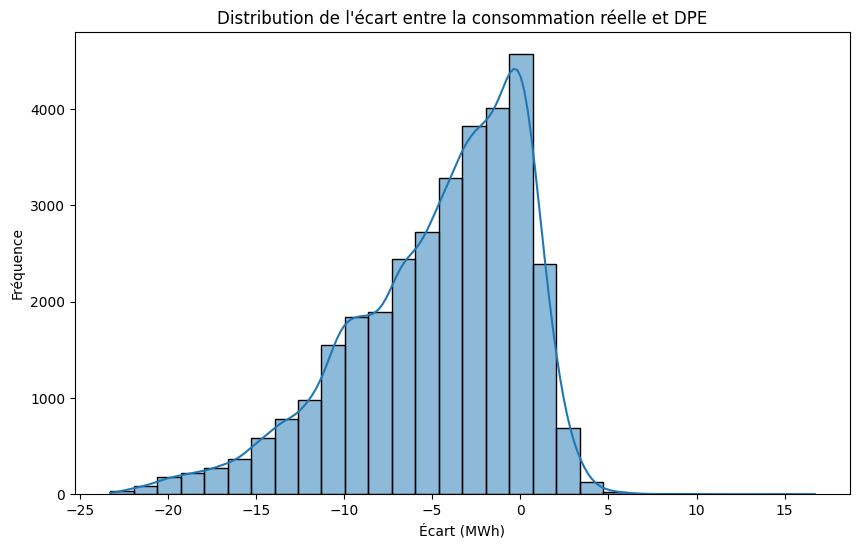

In [520]:
# Analyse de la consommation électrique moyenne réelle vs consommation DPE
# Nous allons comparer les colonnes consommation_annuelle_moyenne_par_site et la consommation DPE

# Calcul de l'écart entre la consommation réelle et la consommation estimée par le DPE
df_union['écart_conso'] = df_union['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'] - df_union['consommation_estimee_dpe_mwh']

# Statistiques descriptives sur cet écart
print("Statistiques sur l'écart entre consommation réelle et DPE:")
print(df_union['écart_conso'].describe())

# Visualisation de la distribution de l'écart entre les consommations
plt.figure(figsize=(10, 6))
sns.histplot(df_union['écart_conso'], kde=True, bins=30)
plt.title("Distribution de l'écart entre la consommation réelle et DPE")
plt.xlabel("Écart (MWh)")
plt.ylabel("Fréquence")
plt.show()

Statistiques sur l'écart entre la consommation moyenne par logement et DPE:
count    32868.000000
mean        -4.629308
std          4.934029
min        -23.272288
25%         -7.639719
50%         -3.572153
75%         -0.751726
max         16.702329
Name: écart_conso_moyenne, dtype: float64


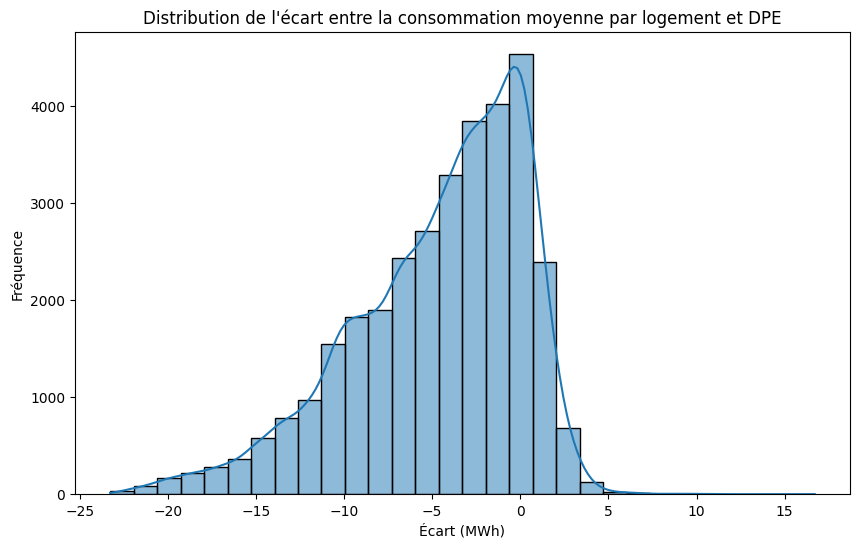

In [521]:
# Création de la colonne consommation moyenne par logement
df_union['consommation_moyenne'] = df_union['consommation_annuelle_totale_de_l_adresse_mwh'] / df_union['nombre_de_logements']

# Calcul de l'écart entre la consommation moyenne par logement et la consommation estimée par le DPE
df_union['écart_conso_moyenne'] = df_union['consommation_moyenne'] - df_union['consommation_estimee_dpe_mwh']

# Statistiques descriptives sur cet écart
print("Statistiques sur l'écart entre la consommation moyenne par logement et DPE:")
print(df_union['écart_conso_moyenne'].describe())

# Visualisation de la distribution de l'écart entre les consommations moyennes et DPE
plt.figure(figsize=(10, 6))
sns.histplot(df_union['écart_conso_moyenne'], kde=True, bins=30)
plt.title("Distribution de l'écart entre la consommation moyenne par logement et DPE")
plt.xlabel("Écart (MWh)")
plt.ylabel("Fréquence")
plt.show()


In [522]:
from sklearn.preprocessing import OrdinalEncoder

# Colonnes catégorielles à encoder
cat_cols = ['Type_installation_ECS_(général)', 
            'Qualité_isolation_menuiseries', 'Qualité_isolation_murs', 'Modèle_DPE',
            'Indicateur_confort_été', 'Type_énergie_n°1', 
            'Date_fin_validité_DPE', 'Type_bâtiment', 'Zone_climatique_', 
            'Type_installation_chauffage', 'Type_énergie_principale_chauffage', 
            'Qualité_isolation_enveloppe', 'Etiquette_GES', 'Etiquette_DPE', 
            'Qualité_isolation_plancher_bas', 'Qualité_isolation_plancher_haut_comble_aménagé', 
            'Besoin_refroidissement','Besoin_ECS']


df_cat = df_union[cat_cols].astype(str)
# Initialiser l'encodeur OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Appliquer l'encodage ordinal sur les colonnes catégorielles
encoded_cat = ordinal_encoder.fit_transform(df_cat)

# Transformer en DataFrame avec les mêmes colonnes qu'avant
encoded_cat_df = pd.DataFrame(encoded_cat, columns=cat_cols)

# Afficher un aperçu du DataFrame encodé
encoded_cat_df.head()


,Type_installation_ECS_(général),Qualité_isolation_menuiseries,Qualité_isolation_murs,Modèle_DPE,Indicateur_confort_été,Type_énergie_n°1,Date_fin_validité_DPE,Type_bâtiment,Zone_climatique_,Type_installation_chauffage,Type_énergie_principale_chauffage,Qualité_isolation_enveloppe,Etiquette_GES,Etiquette_DPE,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_comble_aménagé,Besoin_refroidissement,Besoin_ECS
0,1.0,0.0,3.0,2.0,2.0,8.0,436.0,2.0,5.0,1.0,10.0,3.0,0.0,0.0,3.0,3.0,0.0,9424.0
1,1.0,3.0,3.0,2.0,2.0,8.0,407.0,2.0,0.0,1.0,10.0,3.0,0.0,0.0,3.0,3.0,0.0,9424.0
2,1.0,3.0,3.0,2.0,2.0,8.0,291.0,2.0,7.0,1.0,10.0,3.0,0.0,0.0,0.0,3.0,0.0,9424.0
3,1.0,3.0,3.0,2.0,2.0,8.0,470.0,2.0,0.0,1.0,10.0,3.0,0.0,0.0,3.0,3.0,0.0,9424.0
4,1.0,3.0,3.0,2.0,2.0,8.0,270.0,2.0,4.0,1.0,10.0,3.0,0.0,0.0,0.0,3.0,0.0,9424.0


In [524]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Colonnes à exclure
columns_to_exclude = [
    'nombre_de_logements', 
    'consommation_estimee_dpe_mwh', 
    'ecart_consommation',
    'Coût_total_5_usages', 'Coût_refroidissement', 'Coût_ECS_dépensier',
    'Coût_ECS', 'Coût_éclairage', 'Coût_ECS_énergie_n°1', 'Coût_refroidissement_dépensier',
    'Coût_chauffage', 'Coût_chauffage_dépensier', 'Coût_chauffage_énergie_n°1', 
    'Coût_auxiliaires', 'Coût_chauffage_énergie_n°2', 'Coût_ECS_énergie_n°2',
    'Conso_chauffage_dépensier_é_finale',
    'Conso_5_usages_par_m²_é_primaire',
    'Conso_ECS_dépensier_é_finale',
    'Conso_refroidissement_é_finale',
    'Conso_chauffage_é_primaire',
    'Conso_éclairage_é_primaire',
    'Conso_5_usages_é_finale',
    'Conso_refroidissement_é_primaire',
    'Conso_ECS_é_finale',
    'Conso_éclairage_é_finale',
    'Conso_ECS_dépensier_é_primaire',
    'Conso_refroidissement_dépensier_é_finale',
    'Conso_ECS_é_primaire',
    'Conso_5_usages_é_finale_énergie_n°1',
    'Conso_auxiliaires_é_primaire',
    'Conso_auxiliaires_é_finale',
    'Conso_chauffage_é_finale',
    'Conso_refroidissement_dépensier_é_primaire',
    'Conso_5_usages/m²_é_finale',
    'Conso_chauffage_dépensier_é_primaire',
    'Conso_5_usages_é_primaire',
    'Conso_ECS_dépensier_é_finale',
    'consommation_annuelle_totale_de_l_adresse_mwh',
    'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh',
    'consommation_annuelle_moyenne_de_la_commune_mwh','écart_conso', 'consommation_moyenne',
    'écart_conso_moyenne'
]



# Sélectionner les colonnes numériques
features_num = df_union.select_dtypes(include=[float]).drop(columns=columns_to_exclude)

# Concatenation des colonnes encodées et numériques
features = pd.concat([features_num, encoded_cat_df], axis=1)

# Sélectionner la cible (target)
target = 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'

# Split des données
X_train, X_test, y_train, y_test = train_test_split(features, df_union[target], test_size=0.2, random_state=42)

In [525]:
features_num.columns

Index(['Emission_GES_chauffage', 'Coordonnée_cartographique_X_(BAN)',
       'Nombre_niveau_logement', 'Ubat_W/m²_K', 'Emission_GES_auxiliaires',
       'Emission_GES_5_usages_par_m²', 'Emission_GES_éclairage',
       'Emission_GES_5_usages_énergie_n°1', 'Nombre_appartement',
       'N°_région_(BAN)', 'Surface_habitable_logement',
       'Coordonnée_cartographique_Y_(BAN)', 'Emission_GES_ECS_dépensier',
       'Emission_GES_refroidissement', 'Emission_GES_ECS',
       'Emission_GES_5_usages', 'Code_postal_(BAN)',
       'Emission_GES_refroidissement_dépensier', 'Version_DPE',
       'Emission_GES_chauffage_dépensier', 'Hauteur_sous-plafond', 'Score_BAN',
       'Nombre_niveau_immeuble', 'Surface_habitable_immeuble',
       'Emission_GES_5_usages_énergie_n°2', 'N°_étage_appartement',
       'Déperditions_murs', 'Deperditions_planchers_bas',
       'Deperditions_planchers_hauts', 'Déperditions_renouvellement_air',
       'Déperditions_portes', 'Deperditions_baies_vitrées',
       'Déperd

In [526]:
encoded_cat_df.columns

Index(['Type_installation_ECS_(général)', 'Qualité_isolation_menuiseries',
       'Qualité_isolation_murs', 'Modèle_DPE', 'Indicateur_confort_été',
       'Type_énergie_n°1', 'Date_fin_validité_DPE', 'Type_bâtiment',
       'Zone_climatique_', 'Type_installation_chauffage',
       'Type_énergie_principale_chauffage', 'Qualité_isolation_enveloppe',
       'Etiquette_GES', 'Etiquette_DPE', 'Qualité_isolation_plancher_bas',
       'Qualité_isolation_plancher_haut_comble_aménagé',
       'Besoin_refroidissement', 'Besoin_ECS'],
      dtype='object')

In [527]:
import joblib 
# Sauvegarder les colonnes utilisées pour l'entraînement
joblib.dump(features.columns, 'columns_used_for_training.pkl')

['columns_used_for_training.pkl']

In [528]:
# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [529]:
# Enregistrer le scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [530]:
# Initialiser les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Comparer les modèles et calculer les R²
model_scores = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    model_scores[model_name] = r2

# Afficher les scores des modèles
model_scores

{'Linear Regression': 0.08100998764785183,
 'Random Forest Regressor': 0.7148836118787028,
 'Gradient Boosting Regressor': 0.6817833630812695}

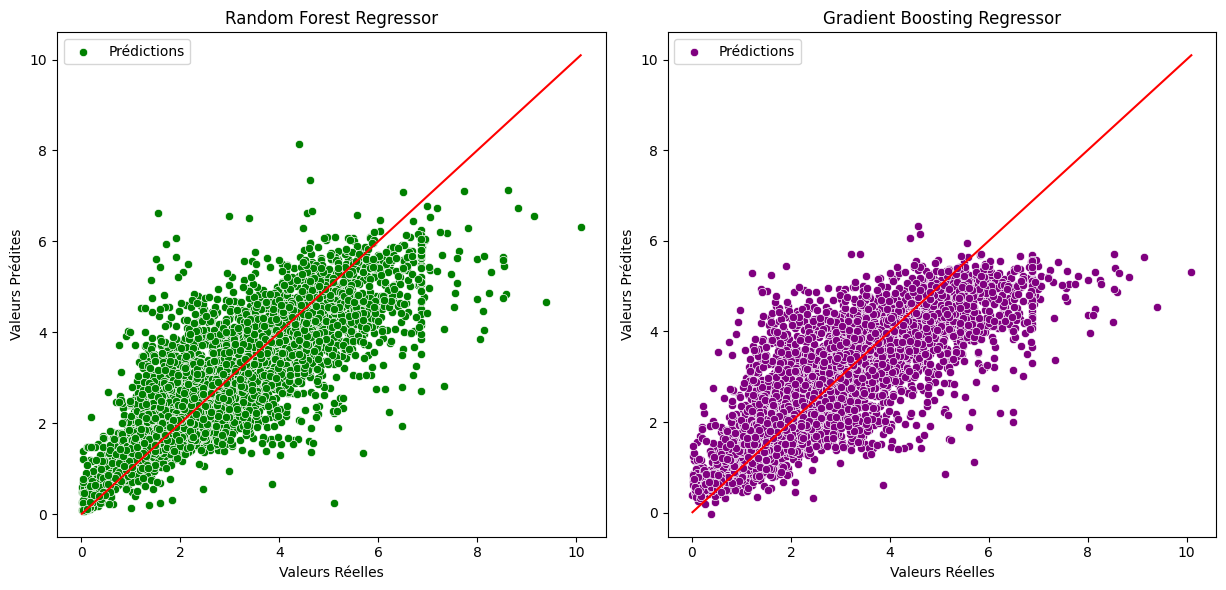

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_rf = models['Random Forest Regressor'].predict(X_test_scaled)
y_pred_gb = models['Gradient Boosting Regressor'].predict(X_test_scaled)

# Comparaison des valeurs réelles et prédites
plt.figure(figsize=(18, 6))



# Comparaison pour Random Forest Regressor
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Réelles')
plt.title('Random Forest Regressor')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

# Comparaison pour Gradient Boosting Regressor
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_gb, color='purple', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Réelles')
plt.title('Gradient Boosting Regressor')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [533]:
import pandas as pd

df_rf = pd.DataFrame({
    'Valeurs Réelles': y_test,
    'Valeurs Prédites Random Forest': y_pred_rf
})

df_gb = pd.DataFrame({
    'Valeurs Réelles': y_test,
    'Valeurs Prédites Gradient Boosting': y_pred_gb
})

print("\nRandom Forest Results:\n", df_rf.head())  # Affiche les 5 premières lignes
print("\nGradient Boosting Results:\n", df_gb.head())  # Affiche les 5 premières lignes

# Si vous utilisez un notebook (Jupyter, Streamlit, etc.) :
# df_lr.head(), df_rf.head(), df_gb.head()  # Pour afficher dans le notebook



Random Forest Results:
        Valeurs Réelles  Valeurs Prédites Random Forest
14906            0.814                         1.19785
3710             2.126                         1.76911
27951            1.932                         2.54754
8980             5.616                         4.19141
10210            1.519                         1.61756

Gradient Boosting Results:
        Valeurs Réelles  Valeurs Prédites Gradient Boosting
14906            0.814                            1.282488
3710             2.126                            2.428959
27951            1.932                            2.543222
8980             5.616                            3.807709
10210            1.519                            1.564246


In [536]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for tuning Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
      'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model_tuned = RandomForestRegressor()

# GridSearchCV to tune the parameters
grid_search_rf = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid_rf, cv=3, scoring='r2')

# Fit the model with grid search
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best model and R² score
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
best_rf_r2_score = r2_score(y_test, y_pred_best_rf)

# Return the best R² score and the best parameters
best_rf_r2_score, grid_search_rf.best_params_


(0.7149385717306229,
 {'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200})

In [537]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = mean_squared_error(y_test, y_pred_best_rf, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 0.5491673809396254
RMSE: 0.7967606832470483


C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


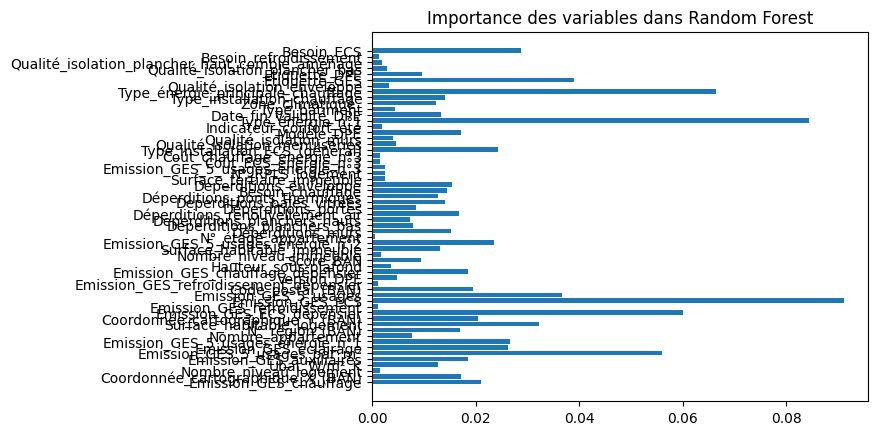

In [538]:
import matplotlib.pyplot as plt

# Importance des variables
importances = best_rf_model.feature_importances_
feature_names = features.columns

# Tracer les importances
plt.barh(feature_names, importances)
plt.title("Importance des variables dans Random Forest")
plt.show()


In [539]:
# Assuming `importances` and `feature_names` are already defined as numpy array and pandas Index respectively
import pandas as pd

# Create a DataFrame to pair the feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order for better readability
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df_sorted


,Feature,Importance
14,Emission_GES_ECS,0.091187
45,Type_énergie_n°1,0.084305
50,Type_énergie_principale_chauffage,0.066474
12,Emission_GES_ECS_dépensier,0.060052
5,Emission_GES_5_usages_par_m²,0.055951
52,Etiquette_GES,0.039052
15,Emission_GES_5_usages,0.036650
10,Surface_habitable_logement,0.032260
57,Besoin_ECS,0.028754
7,Emission_GES_5_usages_énergie_n°1,0.026645


In [541]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
estimators = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=20)),
    ('xgb', XGBRegressor(n_estimators=200))
]

stacking_model = StackingRegressor(
    estimators=estimators, final_estimator=Ridge()
)

stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_model.predict(X_test_scaled)


In [545]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calcul du R²
r2_stacking = r2_score(y_test, y_pred_stacking)

# Calcul du MAE
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

# Calcul du RMSE
rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)

# Affichage des résultats
print(f"R²: {r2_stacking}")
print(f"MAE: {mae_stacking}")
print(f"RMSE: {rmse_stacking}")

# Calcul du R²
r2_stacking = r2_score(y_test, y_pred_stacking)

# Calcul du MAE
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

# Calcul du RMSE
rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)

# Affichage des résultats
print(f"R²: {r2_stacking}")
print(f"MAE: {mae_stacking}")
print(f"RMSE: {rmse_stacking}")


R²: 0.7222769651200223
MAE: 0.5345497944972741
RMSE: 0.7864382320194855
R²: 0.7222769651200223
MAE: 0.5345497944972741
RMSE: 0.7864382320194855


C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
